In this notebook we have performed model optimization, hyperparameter tuning and various other experiments

Importing Modules

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
import pickle

Configuring Pandas

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Importing Data

In [3]:
df = pd.read_csv("csv_building_structure.csv")

Describing Data

In [4]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [6]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [7]:
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,2.087783,1.252058,24.326405,406.672576,16.049372,9.868817,0.042401,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026
std,5.801855e+10,5.807555,581.172767,58117.348412,0.655101,1.063275,65.043704,226.779371,5.493878,8.574169,0.201502,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing
### Cleaning Data

In [8]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [9]:
def cleanDataByReplacing(df):
    nan_cols = [col for col in df.columns if df[col].isna().sum() >0]
    for col in nan_cols:
        if col != 'damage_grade':
            df[col].fillna(df[col].mode()[0],inplace=True)
        else:
            df.dropna(inplace=True)
    return df

In [10]:
def cleanDataByRemoving(df):
    df.dropna(inplace=True)
    return df

In [11]:
# df1 = cleanDataByReplacing(df)
# df1.isna().sum()

In [12]:
df = cleanDataByRemoving(df)
df.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

From this it can be seen that replacing nan data with mode is same as dropping the nan data as there are only 12 missing values altogether in the target column and dropping those values resulted in same result in both replacing and removing the nan data

### Variable Encoding

In [13]:
numeric_cols = [col for col in df.columns if df[col].dtype == 'int64']
numeric_cols

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

- Ordinal variables are those whose values have some kind of order and they were encoded using label encoder
- Similarly all other categorical variables were nomincal variables and they were encoded using One hot encoding

In [14]:
def encodeVariables(df):
    # numeric columns
    numeric_cols = [col for col in df.columns if df[col].dtype == 'int64']
    # Categorical ordinal columns
    cat_ordinal=["land_surface_condition","position","damage_grade","technical_solution_proposed"]
    # Nominal ordinal columns
    cat_nominal=["foundation_type","ground_floor_type","other_floor_type","plan_configuration","condition_post_eq","roof_type"]
    df[cat_ordinal] = df[cat_ordinal].apply(LabelEncoder().fit_transform)
    df = pd.get_dummies(df,columns=cat_nominal,prefix=cat_nominal)
    return df 

In [15]:
# def encodeVariables(df):
#     # numeric columns
#     numeric_cols = [col for col in df.columns if df[col].dtype == 'int64']
#     # Categorical ordinal columns
#     cat_ordinal=["land_surface_condition","position","damage_grade","technical_solution_proposed","condition_post_eq"]
#     # Nominal ordinal columns
#     cat_nominal=["foundation_type","ground_floor_type","other_floor_type","plan_configuration","roof_type"]
#     df[cat_ordinal] = df[cat_ordinal].apply(LabelEncoder().fit_transform)
#     df = pd.get_dummies(df,columns=cat_nominal,prefix=cat_nominal)
#     return df 

In [16]:
df = encodeVariables(df)
df.head(10)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,technical_solution_proposed,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,3,0,1,0,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,3,0,1,0,0,0,0,0,1,0,0,0,4,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,120101000061,12,1207,120703,1,1,18,216,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,120101000071,12,1207,120703,1,0,13,234,9,0,0,3,0,1,0,0,0,0,0,0,0,0,0,4,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,120101000081,12,1207,120703,1,1,8,280,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,120101000091,12,1207,120703,1,1,22,268,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9,120101000101,12,1207,120703,1,1,10,268,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


### Feature Engineering

In [17]:
# Adding two new columns net_floors and net_height from count_floors and height
# df['net_floors'] = df.count_floors_post_eq - df.count_floors_pre_eq
# df['net_height'] = df.height_ft_post_eq - df.height_ft_pre_eq
df['net_floor'] = df['count_floors_pre_eq'] - df['count_floors_post_eq']
df['net_height'] = df['height_ft_pre_eq'] - df['height_ft_post_eq']

We created 2 new features net_floor and net_height using the features count_floors and height_ft

In [18]:
df.shape

(762094, 62)

All the negative height and negative floor values were removed

In [19]:
df = df[df['net_floor'] >= 0]
df.shape

(761247, 62)

In [20]:
df = df[df['net_height'] >= 0]
df.shape

(759416, 62)

We then converted the net_floor and net_height to percentage to minimize the effect of scale

In [21]:
# Adding two new columns net_floors and net_height from count_floors and height
df['net_floor'] = df['net_floor']/df.count_floors_pre_eq
df['net_height'] = df['net_height']/df.height_ft_pre_eq

In [22]:
df['net_floor'].value_counts().sort_values(ascending=False)

0.000000    441631
1.000000    261353
0.500000     32721
0.666667     13242
0.333333      9966
0.250000       305
0.750000        80
0.400000        45
0.200000        36
0.800000        10
0.166667         9
0.600000         9
0.142857         2
0.888889         2
0.777778         2
0.833333         1
0.875000         1
0.125000         1
Name: net_floor, dtype: int64

In [23]:
df['net_height'].value_counts().sort_values(ascending=False)

0.000000    441634
1.000000    261353
0.500000     18577
0.666667      6017
0.333333      5101
0.600000      1960
0.533333      1584
0.611111      1180
0.250000      1098
0.625000      1046
0.466667       941
0.571429       932
0.461538       775
0.555556       757
0.650000       724
0.400000       719
0.562500       596
0.588235       582
0.428571       548
0.538462       542
0.200000       529
0.636364       484
0.444444       474
0.647059       450
0.222222       448
0.300000       436
0.529412       388
0.375000       350
0.285714       348
0.294118       324
0.416667       322
0.700000       316
0.454545       250
0.680000       247
0.437500       242
0.631579       234
0.619048       217
0.545455       209
0.470588       194
0.272727       190
0.526316       189
0.590909       189
0.411765       187
0.550000       180
0.578947       168
0.166667       154
0.681818       151
0.523810       144
0.263158       143
0.318182       139
0.363636       136
0.277778       130
0.720000    

It was seen that net_height and net_floor were perfectly correlated with correlation of 1 so we combined both into net_height_floor by taking average of net_height and net_floor

In [24]:
df['net_height_floor'] = (df['net_height'] + df['net_floor'])/2
df['net_height_floor'].value_counts().sort_values(ascending=False)

0.000000    441630
1.000000    261353
0.500000     18395
0.666667      5719
0.333333      4592
0.516667      1506
0.550000      1001
0.633333       939
0.483333       897
0.638889       799
0.480769       770
0.535714       743
0.645833       705
0.291667       681
0.658333       564
0.527778       559
0.416667       536
0.519231       517
0.531250       507
0.583333       485
0.450000       470
0.464286       457
0.555556       422
0.266667       411
0.277778       400
0.472222       393
0.656863       385
0.316667       384
0.514706       363
0.250000       338
0.562500       333
0.544118       298
0.313725       286
0.458333       282
0.437500       281
0.627451       281
0.651515       269
0.683333       234
0.468750       231
0.477273       226
0.309524       226
0.673333       223
0.611111       199
0.375000       198
0.366667       193
0.649123       191
0.642857       188
0.485294       178
0.619048       177
0.513158       174
0.600000       162
0.455882       161
0.303030    

## Feature Removal

- We removed technical_solution_proposed which had most correlation with the output target variable as it kind of seemed like an output variable itself. 
- Also irrelevant features like building id, district id, vdcmun id, ward id were removed
- We feature engineered net_height_floor from count_floors and height_ft so these two along with net_height and net_floor were also removed

In [25]:
# Removing unwanted columns
df = df.drop(['technical_solution_proposed','building_id','district_id','vdcmun_id','ward_id','count_floors_post_eq','count_floors_pre_eq','height_ft_post_eq','height_ft_pre_eq','net_height','net_floor'],axis=1)

### Feature Selection

- Here damage_grade is the target and rest of all the columns are the features 
- Also for we splitted dataset into training dataset and test dataset using split ratio of 75-25
- Also we used stratify=y so there will be equal percentage of rows in both train and test in each class

In [26]:
def selectFeatures(df):
    # Variables for selecting features 
    random_seed = 42
    test_ratio = 0.25
    # Damage grade is the required target variable
    y = df["damage_grade"]
    # Technical solution proposed is conflicting with output so trying by dropping it
    # Currently considering all other columns as features
    X = df.drop("damage_grade",axis=1)
    # stratify help to make equal distribution of classes in both train and test
    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = test_ratio, random_state = random_seed, stratify = y)
    return X_train, X_test, y_train, y_test, X, y

In [27]:
X_train, X_test, y_train, y_test, X, y = selectFeatures(df)

In [28]:
# Visualise proportions on train and test
pd.merge(y_train.reset_index(name="damage_grade").damage_grade.value_counts(normalize = True).reset_index(name="train"), y_test.reset_index(name="damage_grade").damage_grade.value_counts(normalize = True).reset_index(name="test"),on = "index",how = "left")

,index,train,test
0,4,0.363058,0.363058
1,3,0.241066,0.241064
2,2,0.178704,0.178706
3,1,0.114225,0.114225
4,0,0.102948,0.102948


Checking Correlation

- It can be seen that net_height_floor has highest correlation with the output followed by conidtion_post_eq

In [29]:
# to find correlation between features
corr = X_train.corrwith(y,axis=0)
np.abs(corr).sort_values(ascending=False)

net_height_floor                                             0.758344
condition_post_eq_Not damaged                                0.580947
has_superstructure_mud_mortar_stone                          0.480010
condition_post_eq_Damaged-Rubble unclear                     0.449096
foundation_type_Mud mortar-Stone/Brick                       0.445536
ground_floor_type_RC                                         0.408982
condition_post_eq_Damaged-Rubble clear                       0.397553
roof_type_RCC/RB/RBC                                         0.358057
has_superstructure_cement_mortar_brick                       0.348956
foundation_type_RC                                           0.319177
condition_post_eq_Damaged-Repaired and used                  0.308818
ground_floor_type_Mud                                        0.296036
other_floor_type_RCC/RB/RBC                                  0.285371
other_floor_type_TImber/Bamboo-Mud                           0.251481
foundation_type_Bamb

In [30]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\dell\AppData\Local\Temp\ipykernel_1712\2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age_building,plinth_area_sq_ft,land_surface_condition,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,net_height_floor
age_building,1.00,-0.01,-0.02,-0.02,0.04,0.04,0.02,-0.02,0.02,-0.04,-0.01,-0.04,-0.03,-0.02,-0.01,0.05,-0.05,-0.02,0.07,-0.00,-0.05,-0.01,0.05,-0.00,-0.05,0.00,-0.05,-0.03,0.06,-0.01,0.01,-0.00,-0.00,-0.01,0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.03,-0.02,-0.01,0.01,0.02,-0.01,-0.05,0.01,0.02,-0.04,0.03
plinth_area_sq_ft,-0.01,1.00,-0.02,-0.04,-0.00,-0.24,-0.00,0.07,0.04,0.23,-0.07,-0.05,0.21,0.25,-0.01,-0.17,-0.06,0.13,-0.20,-0.01,0.33,0.01,-0.28,0.01,0.36,-0.00,-0.02,0.34,-0.14,0.02,0.03,0.01,0.01,0.10,0.05,0.01,-0.09,0.02,0.02,0.04,0.02,-0.06,0.05,-0.01,-0.05,-0.07,0.05,0.14,-0.04,-0.16,0.40,-0.10
land_surface_condition,-0.02,-0.02,1.00,0.01,0.01,0.04,0.03,0.01,-0.02,-0.04,0.05,0.04,0.01,-0.02,0.04,0.03,0.02,-0.02,0.01,-0.01,-0.01,0.02,0.01,-0.00,-0.05,0.03,-0.00,-0.01,-0.02,0.03,-0.00,-0.00,0.00,-0.02,0.00,0.02,0.00,0.01,0.00,-0.00,0.01,0.01,0.01,-0.01,-0.02,0.01,0.02,-0.04,-0.02,0.04,-0.03,-0.01
position,-0.02,-0.04,0.01,1.00,-0.04,0.06,-0.03,-0.03,-0.05,-0.05,0.05,0.05,-0.08,-0.08,0.00,-0.03,0.09,-0.03,0.02,-0.01,-0.11,-0.01,0.08,-0.00,-0.10,-0.00,0.04,-0.14,0.02,0.01,-0.01,-0.00,-0.00,0.01,-0.01,0.00,0.02,-0.03,0.00,0.00,-0.00,0.00,0.02,-0.00,-0.02,-0.03,0.02,0.01,0.05,0.02,-0.12,-0.04
has_superstructure_adobe_mud,0.04,-0.00,0.01,-0.04,1.00,-0.15,0.02,-0.00,0.15,-0.05,0.04,-0.01,-0.03,-0.02,0.04,0.01,-0.03,-0.03,0.06,-0.01,-0.04,-0.02,0.05,-0.00,-0.05,-0.01,-0.03,-0.04,0.00,0.05,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.02,0.02,0.00,-0.00,-0.00,0.03,0.01,-0.02,-0.01,-0.02,0.03,-0.04,-0.05,0.07,-0.04,-0.02
has_superstructure_mud_mortar_stone,0.04,-0.24,0.04,0.06,-0.15,1.00,-0.09,-0.13,-0.20,-0.52,-0.12,-0.13,-0.28,-0.25,-0.06,0.48,-0.35,-0.28,0.64,-0.13,-0.41,0.01,0.43,-0.04,-0.56,-0.09,-0.29,-0.39,0.42,-0.05,-0.01,-0.00,-0.00,-0.11,-0.03,-0.03,0.12,-0.06,-0.02,-0.03,-0.02,0.19,-0.15,0.03,0.15,0.18,-0.12,-0.42,0.05,0.19,-0.48,0.29
has_superstructure_stone_flag,0.02,-0.00,0.03,-0.03,0.02,-0.09,1.00,0.03,-0.01,-0.05,0.11,0.04,-0.00,-0.02,0.03,0.07,-0.03,-0.02,0.01,0.17,-0.04,0.05,-0.03,-0.00,-0.05,0.16,0.01,-0.03,-0.10,0.13,0.00,-0.00,0.00,-0.01,-0.00,-0.00,-0.01,0.02,0.00,0.01,0.03,-0.01,-0.00,0.06,0.01,0.02,-0.02,-0.05,-0.00,0.02,-0.04,0.05
has_superstructure_cement_mortar_stone,-0.02,0.07,0.01,-0.03,-0.00,-0.13,0.03,1.00,0.02,0.09,0.01,-0.01,0.08,0.03,0.01,-0.07,-0.01,0.17,-0.13,-0.00,0.08,0.04,-0.14,0.02,0.15,0.01,0.02,0.11,-0.07,0.02,0.00,-0.00,-0.00,0.02,0.00,0.00,-0.02,0.01,0.01,0.01,0.01

### OverSampling

For oversampling we tried two different methods
- Random Oversampling
- SMOTE Oversampling

1) Random Oversampling   
In random oversampling: random set of copies of minority class examples is added to the data.

2) SMOTE Oversampling  
SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbours from the data are set. Synthetic data would then be made between the random data and the randomly selected k-nearest neighbour

In [31]:
def overSampleData(X_train,y_train):
    # random over sampling 
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
    # Check the number of records after over sampling
    print(sorted(Counter(y_train_ros).items()))
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
    # Check the number of records after over sampling
    print(sorted(Counter(y_train_smote).items()))
    return X_train_ros, y_train_ros, X_train_smote,y_train_smote

In [32]:
X_train_ros, y_train_ros, X_train_smote, y_train_smote= overSampleData(X_train,y_train)

[(0, 206784), (1, 206784), (2, 206784), (3, 206784), (4, 206784)]
[(0, 206784), (1, 206784), (2, 206784), (3, 206784), (4, 206784)]


SMOTE oversampling took nearly 13 minutes while random oversampling took about only 10 seconds

In [33]:
def overSampleData(X_train,y_train):
    # random over sampling 
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
    # Check the number of records after over sampling
    print(sorted(Counter(y_train_ros).items()))
    return X_train_ros, y_train_ros

In [34]:
X_train_ros, y_train_ros = overSampleData(X_train,y_train)

[(0, 206784), (1, 206784), (2, 206784), (3, 206784), (4, 206784)]


### UnderSampling

For Undesampling two methods were tried:
- Random Undersampling
- Nearmiss Undersampling

1) Random Undersampling  
in random under-sampling (potentially), vast quantities of data are discarded

2) Nearmiss Undersampling  
IN nearmiss When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution. 

In [33]:
def underSampleData(X_train,y_train,X_test,y_test):
    # random under sampling 
    rus = RandomUnderSampler(random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
    # Check the number of records after over sampling
    print(sorted(Counter(y_train_rus).items()))
    # Nearmiss under sampling 
    nearmiss = NearMiss(version=3)
    X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
    # Check the number of records after over sampling
    print(sorted(Counter(y_train_nearmiss).items()))
    return X_train_rus, y_train_rus, X_train_nearmiss, y_train_nearmiss

In [34]:
X_train_rus, y_train_rus, X_train_nearmiss, y_train_nearmiss = underSampleData(X_train,y_train, X_test, y_test)

[(0, 58635), (1, 58635), (2, 58635), (3, 58635), (4, 58635)]


d:\Programming\Python\.aivenv\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
d:\Programming\Python\.aivenv\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
d:\Programming\Python\.aivenv\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
d:\Programming\Python\.aivenv\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nea

[(0, 58635), (1, 46325), (2, 49412), (3, 50486), (4, 57541)]


Nearmiss Took about 12 mins to complete while random undersampling took about 10 seconds 

In [37]:
def underSampleData(X_train,y_train,X_test,y_test):
    # random under sampling 
    rus = RandomUnderSampler(random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
    # Check the number of records after over sampling
    print(sorted(Counter(y_train_rus).items()))
    return X_train_rus, y_train_rus

In [38]:
X_train_rus, y_train_rus = underSampleData(X_train,y_train, X_test, y_test)

[(0, 58635), (1, 58635), (2, 58635), (3, 58635), (4, 58635)]


### Feature Scaling

We used Standard Scaler to scale the features so that all features have values between 0 and 1.

In [35]:
def scaleFeatures(X_train,X_test):
    scaler = StandardScaler() 
    X_train1 = scaler.fit_transform(X_train)
    X_test1 = scaler.transform(X_test)
    return X_train1, X_test1

In [37]:
X_train_normal, X_test_normal = scaleFeatures(X_train,X_test)
X_train_ros1, X_test_ros1 = scaleFeatures(X_train_ros,X_test)
X_train_smote1, X_test_smote1 = scaleFeatures(X_train_smote,X_test)
X_train_rus1, X_test_rus1 = scaleFeatures(X_train_rus,X_test)
X_train_nearmiss1, X_test_nearmiss1 = scaleFeatures(X_train_nearmiss,X_test)

Feature Scaling helped to reduce computational time when training the models and helped to improve fairness in the project

## PCA

- PCA was done after checking feature importances of model and to reduce the dimensionality.
- We tried PCA to check how will affect overall performance of model.

In [38]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=22)
X_train_normal_pca = pca.fit_transform(X_train_normal)
X_test_normal_pca = pca.transform(X_test_normal)

In [39]:
pca = PCA(n_components=22)
X_train_rus_pca = pca.fit_transform(X_train_rus1)
X_test_rus_pca = pca.transform(X_test_rus1)

In [40]:
pca = PCA(n_components=22)
X_train_smote_pca = pca.fit_transform(X_train_smote1)
X_test_smote_pca = pca.transform(X_test_smote1)

In [41]:
pca = PCA(n_components=22)
X_train_ros_pca = pca.fit_transform(X_train_ros1)
X_test_ros_pca = pca.transform(X_test_ros1)

In [42]:
pca = PCA(n_components=22)
X_train_nearmiss_pca = pca.fit_transform(X_train_nearmiss1)
X_test_nearmiss_pca = pca.transform(X_test_nearmiss1)

In [43]:
X_train_normal_pca = pd.DataFrame(X_train_normal_pca)
X_test_normal_pca = pd.DataFrame(X_test_normal_pca)
X_train_ros_pca = pd.DataFrame(X_train_ros_pca)
X_test_ros_pca = pd.DataFrame(X_test_ros_pca)
X_train_rus_pca = pd.DataFrame(X_train_rus_pca)
X_test_rus_pca = pd.DataFrame(X_test_rus_pca)
X_train_smote_pca = pd.DataFrame(X_train_smote_pca)
X_test_smote_pca = pd.DataFrame(X_test_smote_pca)
X_train_nearmiss_pca = pd.DataFrame(X_train_nearmiss_pca)
X_test_nearmiss_pca = pd.DataFrame(X_test_nearmiss_pca)

After PCA slight overfitting was seen

### Model Training
From previous model training we found that Random Forest model gave maximum performance so now we are only evaluating and optimizing the random forest model by oversampling, undersampling and then hyperparameter tuning

Model Training

In [44]:
RANDOM_STATE=42

### Different Hyperparameters tried manually and their corresponding test and train scores
n_estimators=200,min_samples_split=10,min_samples_leaf=3,max_depth=10,random_state=RANDOM_STATE => 72, 73 less overfitting  
n_estimators=200,min_samples_split=10,min_samples_leaf=3,max_depth=20,random_state=RANDOM_STATE => 76, 79
n_estimators=200,min_samples_split=15,min_samples_leaf=3,max_depth=30,random_state=RANDOM_STATE => 77 83
n_estimators=300,min_samples_split=10,min_samples_leaf=3,max_depth=30,random_state=RANDOM_STATE => 77 84
n_estimators=250,min_samples_split=10,min_samples_leaf=3,max_depth=25,random_state=RANDOM_STATE => 77 82
n_estimators=200,min_samples_split=20,min_samples_leaf=5,max_depth=25,random_state=RANDOM_STATE => 76 80
n_estimators=400,min_samples_split=30,min_samples_leaf=10,max_depth=50,random_state=RANDOM_STATE => 76 79
n_estimators=300,min_samples_split=10,min_samples_leaf=20,max_depth=50,random_state=RANDOM_STATE => 75 77
n_estimators=250,min_samples_split=15,min_samples_leaf=20,max_depth=30,random_state=RANDOM_STATE => 75 77
No params: 77 99
n_estimators=150,min_samples_split=5,min_samples_leaf=5,max_depth=30,random_state=RANDOM_STATE => 77 82 => tune 1
n_estimators=200,min_samples_split=5,min_samples_leaf=5,max_depth=100,random_state=RANDOM_STATE => 77 82
n_estimators=200,min_samples_split=20,min_samples_leaf=20,max_depth=100,random_state=RANDOM_STATE => 75 77
n_estimators=200,min_samples_split=100,min_samples_leaf=100,max_depth=100,random_state=RANDOM_STATE => 74 74
n_estimators=300,min_samples_split=200,min_samples_leaf=200,max_depth=200,random_state=RANDOM_STATE => 73 73
n_estimators=100,min_samples_split=20,min_samples_leaf=20,max_depth=150,random_state=RANDOM_STATE => 75.9 77.51 => tune2
After Removing ids
n_estimators=150,min_samples_split=5,min_samples_leaf=5,max_depth=30,random_state=RANDOM_STATE => 73 76

1) Normal means normal data without undersampling or oversampling was used to train model

In [47]:
forest1 = RandomForestClassifier(n_estimators=150,min_samples_split=5,min_samples_leaf=5,max_depth=30,random_state=RANDOM_STATE)
forest1.fit(X_train_normal,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150, random_state=42)

Using PCA Data

In [48]:
forest1_pca = RandomForestClassifier(n_estimators=150,min_samples_split=5,min_samples_leaf=5,max_depth=30,random_state=RANDOM_STATE)
forest1_pca.fit(X_train_normal_pca,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150, random_state=42)

2. Model Trained using Random Oversampling

In [49]:
forest2 = RandomForestClassifier(n_estimators=150,min_samples_split=5,min_samples_leaf=5,max_depth=30,random_state=RANDOM_STATE)
forest2.fit(X_train_ros1,y_train_ros)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150, random_state=42)

Using PCA Data

In [50]:
forest2_pca = RandomForestClassifier(n_estimators=150,min_samples_split=5,min_samples_leaf=5,max_depth=30,random_state=RANDOM_STATE)
forest2_pca.fit(X_train_ros_pca,y_train_ros)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150, random_state=42)

3. Model Trained using SMOTE Oversampling

In [51]:
forest3 = RandomForestClassifier()
forest3.fit(X_train_smote1,y_train_smote)

RandomForestClassifier()

Using PCA

In [52]:
forest3_pca = RandomForestClassifier()
forest3_pca.fit(X_train_smote_pca,y_train_smote)

RandomForestClassifier()

4. Model Trained using Random Undersampling

In [53]:
forest4 = RandomForestClassifier(n_estimators=150,min_samples_split=5,min_samples_leaf=5,max_depth=30,random_state=RANDOM_STATE)
forest4.fit(X_train_rus1,y_train_rus)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150, random_state=42)

Using PCA

In [54]:
forest4_pca = RandomForestClassifier(n_estimators=150,min_samples_split=5,min_samples_leaf=5,max_depth=30,random_state=RANDOM_STATE)
forest4_pca.fit(X_train_rus_pca,y_train_rus)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150, random_state=42)

5. Model Trained using Nearmiss Undersampling

In [55]:
forest5 = RandomForestClassifier()
forest5.fit(X_train_nearmiss1,y_train_nearmiss)

RandomForestClassifier()

Using PCA

In [56]:
forest5_pca = RandomForestClassifier()
forest5_pca.fit(X_train_nearmiss_pca,y_train_nearmiss)

RandomForestClassifier()

6. Also tried Gradient Boosting after feature removal and feature engineering

In [57]:
grad = GradientBoostingClassifier()
grad.fit(X_train_normal,y_train)

GradientBoostingClassifier()

### Some hyperparameters tuned manually using XGBoost
max_depth=8,max_leaves=5,n_estimators=120,colsample_bytree=0.7,subsample=0.7,n_jobs=4 => 78,81
max_depth=9,max_leaves=5,n_estimators=150,colsample_bytree=0.8,subsample=0.6,n_jobs=4 => 73 78
max_depth=8,max_leaves=5,n_estimators=120,colsample_bytree=0.7,subsample=0.7,n_jobs=4 => after removing net height floor => 73 76
max_depth=8,max_leaves=5,n_estimators=120,colsample_bytree=0.7,subsample=0.7,n_jobs=4 => after removing net height floor and ordinal encoding of condition_post_eq => 73 76

7. Also tried XGBoost

In [58]:
xgb = XGBClassifier(max_depth=8,max_leaves=5,n_estimators=120,colsample_bytree=0.7,subsample=0.7,n_jobs=4)
xgb.fit(X_train_normal,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=5, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=120,
              n_jobs=4, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

## Model Evaluation

In [59]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# function to evaluate metrics
def showMetrics(y_predict,y_true=y_test):
    """
    y_predict: Predicted y values from model
    y_true: either y_test(default) for test scores or y_train for train scores
    """
    precision = precision_score(y_true,y_predict,average='weighted')
    recall = recall_score(y_true,y_predict,average='weighted')
    accuracy = accuracy_score(y_true,y_predict)
    f1score = f1_score(y_true,y_predict,average='weighted')
    cr = classification_report(y_true,y_predict)
    print('-------- Evaluated Metrics -----------')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1score}")
    print(f"Classification Report:\n {cr}")

#function to show confustion matrix
def showConfusionMatrix(model,X_true,y_true):
    """
    model: model for which confusion matrix is created
    X_true: X_test or X_Train for test/train data
    y_true: X_test or X_train for test/train data
    """
    class_names =['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
    ConfusionMatrixDisplay.from_estimator(model, X_true, y_true, display_labels=class_names);

Results for Gradient Boosting

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.724066914576464
Precision: 0.7323357437015602
Recall: 0.724066914576464
F1 Score: 0.7237522326481926
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88     19545
           1       0.48      0.36      0.41     21686
           2       0.41      0.39      0.40     33928
           3       0.60      0.77      0.67     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.72    189854
   macro avg       0.69      0.66      0.67    189854
weighted avg       0.73      0.72      0.72    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7246147039303886
Precision: 0.7329169921539941
Recall: 0.7246147039303886
F1 Score: 0.7243486058592169
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.8

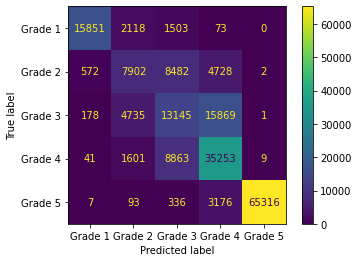

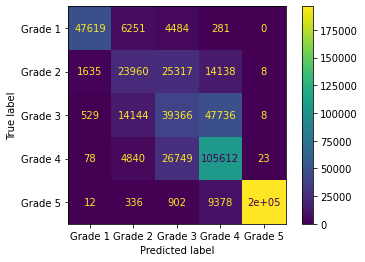

In [60]:
# for test data
# variables
evaluated_model = grad
XTest = X_test_normal
XTrain = X_train_normal
yTest = y_test
yTrain = y_train
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

Results for XGBoost

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7304929050744257
Precision: 0.7347224291835097
Recall: 0.7304929050744257
F1 Score: 0.7280395326250526
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88     19545
           1       0.49      0.40      0.44     21686
           2       0.43      0.37      0.40     33928
           3       0.60      0.79      0.68     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.73    189854
   macro avg       0.69      0.67      0.67    189854
weighted avg       0.73      0.73      0.73    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7540724275847055
Precision: 0.7594347826239929
Recall: 0.7540724275847055
F1 Score: 0.7521349986304258
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0

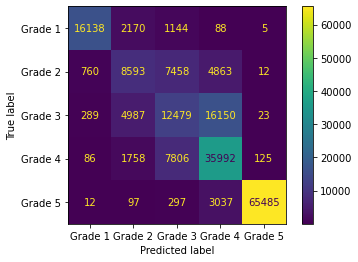

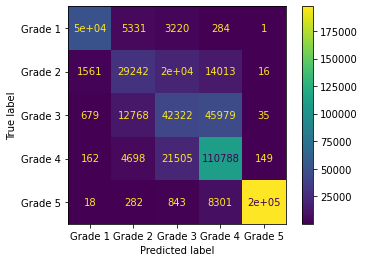

In [61]:
# for test data
# variables
evaluated_model = xgb
XTest = X_test_normal
XTrain = X_train_normal
yTest = y_test
yTrain = y_train
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

Results for Normal Random Forest

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7311460385348741
Precision: 0.7378791081680737
Recall: 0.7311460385348741
F1 Score: 0.7294332034145107
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88     19545
           1       0.49      0.39      0.43     21686
           2       0.43      0.38      0.40     33928
           3       0.60      0.79      0.68     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.73    189854
   macro avg       0.69      0.66      0.67    189854
weighted avg       0.74      0.73      0.73    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7498551518535296
Precision: 0.7579028161317946
Recall: 0.7498551518535296
F1 Score: 0.7486655355099612
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0

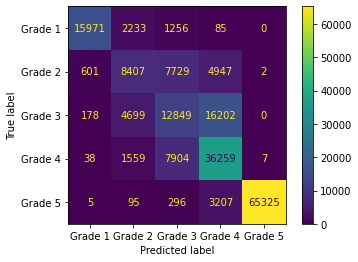

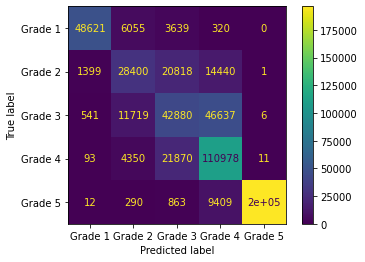

In [62]:
# for test data
# variables
evaluated_model = forest1
XTest = X_test_normal
XTrain = X_train_normal
yTest = y_test
yTrain = y_train
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

For PCA

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7250729507937679
Precision: 0.7275054463418051
Recall: 0.7250729507937679
F1 Score: 0.7213945055658144
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86     19545
           1       0.47      0.40      0.43     21686
           2       0.43      0.34      0.38     33928
           3       0.59      0.79      0.67     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.73    189854
   macro avg       0.68      0.66      0.66    189854
weighted avg       0.73      0.73      0.72    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.842431552666786
Precision: 0.8500590243433482
Recall: 0.842431552666786
F1 Score: 0.8421720290765037
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.9

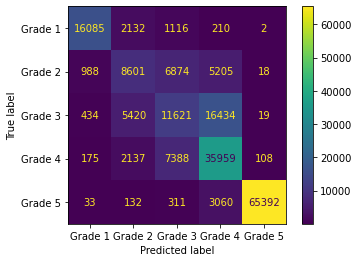

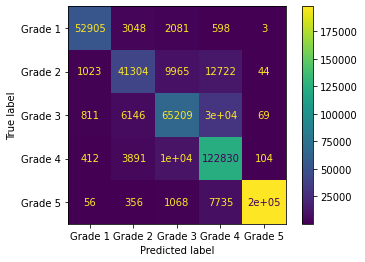

In [63]:
# for test data
# variables
evaluated_model = forest1_pca
XTest = X_test_normal_pca
XTrain = X_train_normal_pca
yTest = y_test
yTrain = y_train
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

Results for random oversampling

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7227606476555669
Precision: 0.7330739526050846
Recall: 0.7227606476555669
F1 Score: 0.722238795528278
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87     19545
           1       0.41      0.58      0.48     21686
           2       0.44      0.30      0.36     33928
           3       0.62      0.72      0.67     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.72    189854
   macro avg       0.68      0.68      0.67    189854
weighted avg       0.73      0.72      0.72    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7356110724233983
Precision: 0.7469237879796466
Recall: 0.7356110724233983
F1 Score: 0.734456437558851
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.8

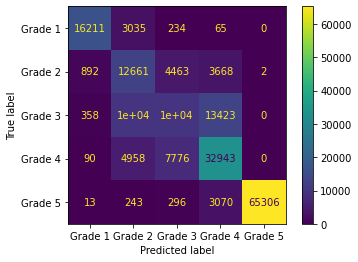

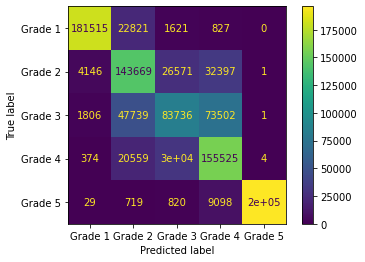

In [64]:
# for test data
# variables
evaluated_model = forest2
XTest = X_test_ros1
XTrain = X_train_ros1
yTrain = y_train_ros
yTest = y_test
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

For PCA

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7158922119102047
Precision: 0.7233150100500291
Recall: 0.7158922119102047
F1 Score: 0.7170356838384321
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     19545
           1       0.41      0.51      0.45     21686
           2       0.42      0.33      0.37     33928
           3       0.61      0.70      0.65     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.72    189854
   macro avg       0.66      0.66      0.66    189854
weighted avg       0.72      0.72      0.72    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.8878907458991024
Precision: 0.8903499446675412
Recall: 0.8878907458991024
F1 Score: 0.8885743003822578
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0

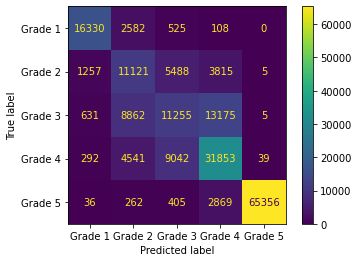

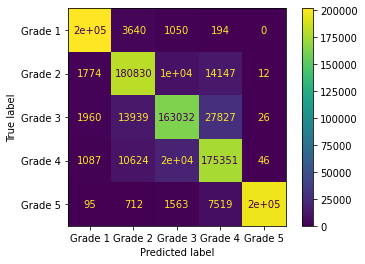

In [65]:
# for test data
# variables
evaluated_model = forest2_pca
XTest = X_test_ros_pca
XTrain = X_train_ros_pca
yTrain = y_train_ros
yTest = y_test
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

Results for SMOTE oversampling

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.6973305803406828
Precision: 0.7017481963491771
Recall: 0.6973305803406828
F1 Score: 0.6992225085042165
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     19545
           1       0.40      0.41      0.40     21686
           2       0.39      0.38      0.38     33928
           3       0.59      0.63      0.61     45767
           4       0.98      0.95      0.97     68928

    accuracy                           0.70    189854
   macro avg       0.64      0.64      0.64    189854
weighted avg       0.70      0.70      0.70    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.9450740869699783
Precision: 0.945180446528756
Recall: 0.9450740869699783
F1 Score: 0.945116209456553
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.9

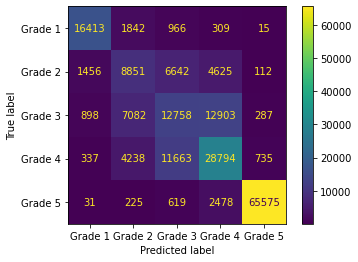

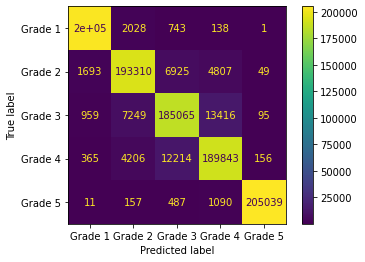

In [66]:
# for test data
# variables
evaluated_model = forest3
XTest = X_test_smote1
XTrain = X_train_smote1
yTrain = y_train_smote
yTest = y_test
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

For PCA

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7138643378596184
Precision: 0.7179807629809033
Recall: 0.7138643378596184
F1 Score: 0.713848734832689
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85     19545
           1       0.43      0.43      0.43     21686
           2       0.41      0.35      0.38     33928
           3       0.59      0.72      0.65     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.71    189854
   macro avg       0.66      0.65      0.66    189854
weighted avg       0.72      0.71      0.71    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.945076988548437
Precision: 0.9451890710942134
Recall: 0.945076988548437
F1 Score: 0.9451196832534305
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99

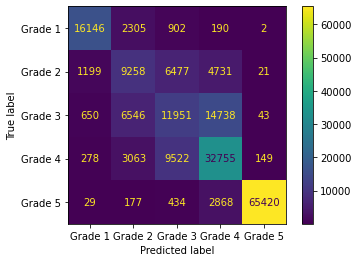

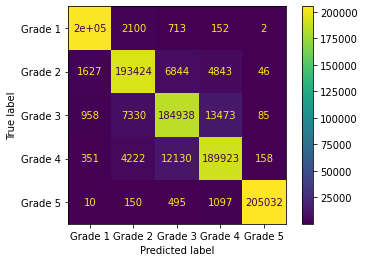

In [67]:
# for test data
# variables
evaluated_model = forest3_pca
XTest = X_test_smote_pca
XTrain = X_train_smote_pca
yTrain = y_train_smote
yTest = y_test
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

Results for Random undersampling

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7213648382441245
Precision: 0.7334194685187303
Recall: 0.7213648382441245
F1 Score: 0.7202063814936178
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88     19545
           1       0.40      0.61      0.48     21686
           2       0.44      0.28      0.34     33928
           3       0.62      0.72      0.66     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.72    189854
   macro avg       0.68      0.68      0.67    189854
weighted avg       0.73      0.72      0.72    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7031909269207811
Precision: 0.7158041271887328
Recall: 0.7031909269207811
F1 Score: 0.7009214185893995
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0

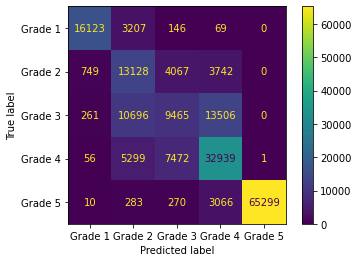

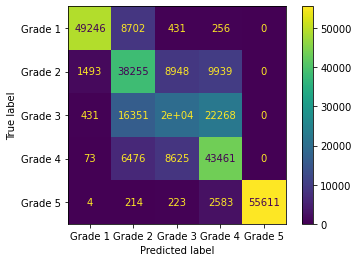

In [68]:
# for test data
# variables
evaluated_model = forest4
XTest = X_test_rus1
XTrain = X_train_rus1
yTrain = y_train_rus
yTest = y_test
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.7127476903304645
Precision: 0.7231927557518618
Recall: 0.7127476903304645
F1 Score: 0.7149348285486036
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     19545
           1       0.40      0.56      0.47     21686
           2       0.42      0.32      0.37     33928
           3       0.62      0.67      0.64     45767
           4       1.00      0.95      0.97     68928

    accuracy                           0.71    189854
   macro avg       0.66      0.67      0.66    189854
weighted avg       0.72      0.71      0.71    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.8301219408203292
Precision: 0.8347311735496322
Recall: 0.8301219408203292
F1 Score: 0.8313933894485643
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0

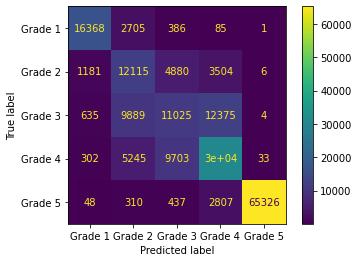

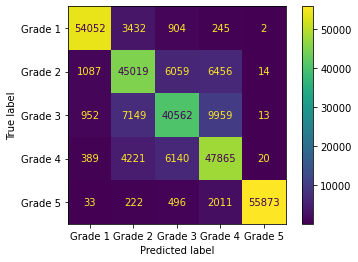

In [69]:
# for test data
# variables
evaluated_model = forest4_pca
XTest = X_test_rus_pca
XTrain = X_train_rus_pca
yTrain = y_train_rus
yTest = y_test
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

Results for nearmiss undersampling

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.6768622204430773
Precision: 0.6765009624087687
Recall: 0.6768622204430773
F1 Score: 0.6762331479278431
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     19545
           1       0.35      0.41      0.38     21686
           2       0.38      0.34      0.36     33928
           3       0.57      0.56      0.57     45767
           4       0.95      0.95      0.95     68928

    accuracy                           0.68    189854
   macro avg       0.62      0.62      0.62    189854
weighted avg       0.68      0.68      0.68    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.9467642788272821
Precision: 0.9470217787007479
Recall: 0.9467642788272821
F1 Score: 0.9468400497693297
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0

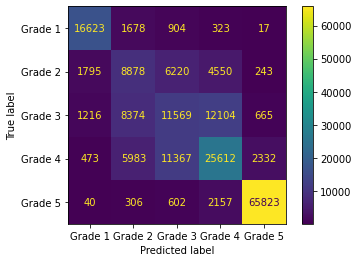

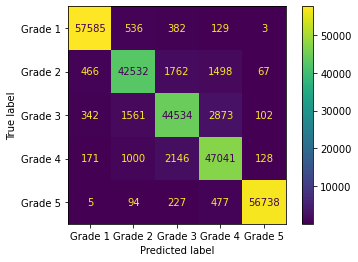

In [70]:
# for test data
# variables
evaluated_model = forest5
XTest = X_test_nearmiss1
XTrain = X_train_nearmiss1
yTrain = y_train_nearmiss
yTest = y_test
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.692094978246442
Precision: 0.6936915836342203
Recall: 0.692094978246442
F1 Score: 0.6925066293402139
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     19545
           1       0.39      0.42      0.40     21686
           2       0.38      0.35      0.36     33928
           3       0.58      0.62      0.60     45767
           4       0.98      0.95      0.96     68928

    accuracy                           0.69    189854
   macro avg       0.63      0.64      0.63    189854
weighted avg       0.69      0.69      0.69    189854

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.9467490348667488
Precision: 0.9470117359744653
Recall: 0.9467490348667488
F1 Score: 0.9468303513880252
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.9

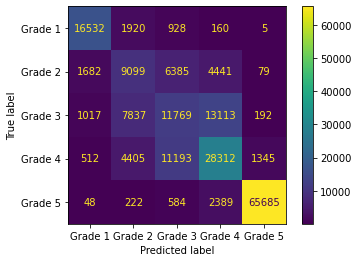

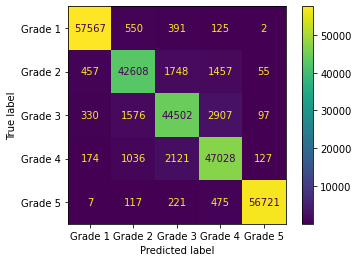

In [71]:
# for test data
# variables
evaluated_model = forest5_pca
XTest = X_test_nearmiss_pca
XTrain = X_train_nearmiss_pca
yTrain = y_train_nearmiss
yTest = y_test
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,yTest)
showConfusionMatrix(evaluated_model, XTest,yTest)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,yTrain)
showConfusionMatrix(evaluated_model, XTrain, yTrain)

#### Metrics DataFrame 
This dataframe will contain different metrics values for different cases like normal data, undersampled data(random, nearmiss), oversampled_data(random, nearmiss), hyperparameter_tuned_model(gridsearch, randomsearch)

In [72]:
metrics_df = pd.DataFrame(columns=['Model Name','Accuracy_Test','Accuracy_Train','Precision_Test','Precision_Train','Recall_Test','Recall_Train','F1_Score_Test','F1_Score_Train'])

In [73]:
# Function to get different performance metrics for a model
def model_parameters(model,X_train,X_test,y_train,y_test):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    precision_test = precision_score(y_test,y_pred_test,average='weighted')
    recall_test = recall_score(y_test,y_pred_test,average='weighted')
    f1score_test = f1_score(y_test,y_pred_test,average='weighted')
    accuracy_train = accuracy_score(y_train,y_pred_train)
    precision_train = precision_score(y_train,y_pred_train,average='weighted')
    recall_train = recall_score(y_train,y_pred_train,average='weighted')
    f1score_train = f1_score(y_train,y_pred_train,average='weighted')
    return accuracy_test, accuracy_train, precision_test, precision_train, recall_test, recall_train, f1score_test, f1score_train

In [74]:
# Normal
accuracy_test_normal, accuracy_train_normal, precision_test_normal, precision_train_normal, recall_test_normal, recall_train_normal, f1score_test_normal, f1score_train_normal = model_parameters(forest1, X_train_normal, X_test_normal, y_train, y_test)
# Random Oversampling
accuracy_test_ros, accuracy_train_ros, precision_test_ros, precision_train_ros, recall_test_ros, recall_train_ros, f1score_test_ros, f1score_train_ros = model_parameters(forest2, X_train_ros1, X_test_ros1, y_train_ros, y_test)
# SMOTE Oversampling
accuracy_test_smote, accuracy_train_smote, precision_test_smote, precision_train_smote, recall_test_smote, recall_train_smote, f1score_test_smote, f1score_train_smote = model_parameters(forest3, X_train_smote1, X_test_smote1, y_train_smote, y_test)
# Random Undersampling
accuracy_test_rus, accuracy_train_rus, precision_test_rus, precision_train_rus, recall_test_rus, recall_train_rus, f1score_test_rus, f1score_train_rus = model_parameters(forest4, X_train_rus1, X_test_rus1, y_train_rus, y_test)
# Nearmiss Undersampling
accuracy_test_nearmiss, accuracy_train_nearmiss, precision_test_nearmiss, precision_train_nearmiss, recall_test_nearmiss, recall_train_nearmiss, f1score_test_nearmiss, f1score_train_nearmiss = model_parameters(forest5, X_train_nearmiss1, X_test_nearmiss1, y_train_nearmiss, y_test)

In [76]:
# Creating df 
metrics_df['Model Name'] = ['Normal', 'Random Oversampling', 'SMOTE Oversampling', 'Random Undersampling', 'Near Miss Undersampling']
metrics_df['Accuracy_Test'] = [accuracy_test_normal, accuracy_test_ros, accuracy_test_smote, accuracy_test_rus, accuracy_test_nearmiss]
metrics_df['Accuracy_Train'] = [accuracy_train_normal, accuracy_train_ros, accuracy_train_smote, accuracy_train_rus, accuracy_train_nearmiss]
metrics_df['Precision_Test'] = [precision_test_normal, precision_test_ros, precision_test_smote, precision_test_rus, precision_test_nearmiss]
metrics_df['Precision_Train'] = [precision_train_normal, precision_train_ros, precision_train_smote, precision_train_rus, precision_train_nearmiss]
metrics_df['Recall_Test'] = [recall_test_normal, recall_test_ros, recall_test_smote, recall_test_rus, recall_test_nearmiss]
metrics_df['Recall_Train'] = [recall_train_normal, recall_train_ros, recall_train_smote, recall_train_rus, recall_train_nearmiss]
metrics_df['F1_Score_Test'] = [f1score_test_normal, f1score_test_ros, f1score_test_smote, f1score_test_rus, f1score_test_nearmiss]
metrics_df['F1_Score_Train'] = [f1score_train_normal, f1score_train_ros, f1score_train_smote, f1score_train_rus, f1score_train_nearmiss]

In [77]:
metrics_df.to_csv('sampling_methods_net_floor_height_1.csv')
metrics_df.head()

,Model Name,Accuracy_Test,Accuracy_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train,F1_Score_Test,F1_Score_Train
0,Normal,0.731146,0.749855,0.737879,0.757903,0.731146,0.749855,0.729433,0.748666
1,Random Oversampling,0.722761,0.735611,0.733074,0.746924,0.722761,0.735611,0.722239,0.734456
2,SMOTE Oversampling,0.697331,0.945074,0.701748,0.945180,0.697331,0.945074,0.699223,0.945116
3,Random Undersampling,0.721365,0.703191,0.733419,0.715804,0.721365,0.703191,0.720206,0.700921
4,Near Miss Undersampling,0.676862,0.946764,0.676501,0.947022,0.676862,0.946764,0.676233,0.946840


For PCA

In [78]:
# Normal
accuracy_test_normal, accuracy_train_normal, precision_test_normal, precision_train_normal, recall_test_normal, recall_train_normal, f1score_test_normal, f1score_train_normal = model_parameters(forest1_pca, X_train_normal_pca, X_test_normal_pca, y_train, y_test)
# Random Oversampling
accuracy_test_ros, accuracy_train_ros, precision_test_ros, precision_train_ros, recall_test_ros, recall_train_ros, f1score_test_ros, f1score_train_ros = model_parameters(forest2_pca, X_train_ros_pca, X_test_ros_pca, y_train_ros, y_test)
# SMOTE Oversampling
accuracy_test_smote, accuracy_train_smote, precision_test_smote, precision_train_smote, recall_test_smote, recall_train_smote, f1score_test_smote, f1score_train_smote = model_parameters(forest3_pca, X_train_smote_pca, X_test_smote_pca, y_train_smote, y_test)
# Random Undersampling
accuracy_test_rus, accuracy_train_rus, precision_test_rus, precision_train_rus, recall_test_rus, recall_train_rus, f1score_test_rus, f1score_train_rus = model_parameters(forest4_pca, X_train_rus_pca, X_test_rus_pca, y_train_rus, y_test)
# Nearmiss Undersampling
accuracy_test_nearmiss, accuracy_train_nearmiss, precision_test_nearmiss, precision_train_nearmiss, recall_test_nearmiss, recall_train_nearmiss, f1score_test_nearmiss, f1score_train_nearmiss = model_parameters(forest5_pca, X_train_nearmiss_pca, X_test_nearmiss_pca, y_train_nearmiss, y_test)

DataFrame for all the 5 methods

In [79]:
# Creating df 
metrics_df['Model Name'] = ['Normal', 'Random Oversampling', 'SMOTE Oversampling', 'Random Undersampling', 'Near Miss Undersampling']
metrics_df['Accuracy_Test'] = [accuracy_test_normal, accuracy_test_ros, accuracy_test_smote, accuracy_test_rus, accuracy_test_nearmiss]
metrics_df['Accuracy_Train'] = [accuracy_train_normal, accuracy_train_ros, accuracy_train_smote, accuracy_train_rus, accuracy_train_nearmiss]
metrics_df['Precision_Test'] = [precision_test_normal, precision_test_ros, precision_test_smote, precision_test_rus, precision_test_nearmiss]
metrics_df['Precision_Train'] = [precision_train_normal, precision_train_ros, precision_train_smote, precision_train_rus, precision_train_nearmiss]
metrics_df['Recall_Test'] = [recall_test_normal, recall_test_ros, recall_test_smote, recall_test_rus, recall_test_nearmiss]
metrics_df['Recall_Train'] = [recall_train_normal, recall_train_ros, recall_train_smote, recall_train_rus, recall_train_nearmiss]
metrics_df['F1_Score_Test'] = [f1score_test_normal, f1score_test_ros, f1score_test_smote, f1score_test_rus, f1score_test_nearmiss]
metrics_df['F1_Score_Train'] = [f1score_train_normal, f1score_train_ros, f1score_train_smote, f1score_train_rus, f1score_train_nearmiss]

DataFrame for only considering 3 methods

In [197]:
# Creating df 
metrics_df['Model Name'] = ['Normal', 'Random Oversampling', 'Random Undersampling']
metrics_df['Accuracy_Test'] = [accuracy_test_normal, accuracy_test_ros, accuracy_test_rus]
metrics_df['Accuracy_Train'] = [accuracy_train_normal, accuracy_train_ros,  accuracy_train_rus]
metrics_df['Precision_Test'] = [precision_test_normal, precision_test_ros,  precision_test_rus]
metrics_df['Precision_Train'] = [precision_train_normal, precision_train_ros, precision_train_rus]
metrics_df['Recall_Test'] = [recall_test_normal, recall_test_ros, recall_test_rus]
metrics_df['Recall_Train'] = [recall_train_normal, recall_train_ros ,recall_train_rus]
metrics_df['F1_Score_Test'] = [f1score_test_normal, f1score_test_ros ,f1score_test_rus]
metrics_df['F1_Score_Train'] = [f1score_train_normal, f1score_train_ros, f1score_train_rus]

### Saving metrics in csv file

In [80]:
metrics_df.to_csv('sampling_methods_net_floor_height_pca_1.csv')
metrics_df.head()

,Model Name,Accuracy_Test,Accuracy_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train,F1_Score_Test,F1_Score_Train
0,Normal,0.725073,0.842432,0.727505,0.850059,0.725073,0.842432,0.721395,0.842172
1,Random Oversampling,0.715892,0.887891,0.723315,0.890350,0.715892,0.887891,0.717036,0.888574
2,SMOTE Oversampling,0.713864,0.945077,0.717981,0.945189,0.713864,0.945077,0.713849,0.945120
3,Random Undersampling,0.712748,0.830122,0.723193,0.834731,0.712748,0.830122,0.714935,0.831393
4,Near Miss Undersampling,0.692095,0.946749,0.693692,0.947012,0.692095,0.946749,0.692507,0.946830


The above data is for parameters: n_estimators: 500, max_depth:6, njobs: -1   
If no parameter was used during training model was overfitted  
So no finding best parameters using some hyperparameter tuning methods like GridSearch and RandomizedSearch

Plot Feature Importance

In [81]:
def plot_feature_importance(model,X):
    feature_importances = model.feature_importances_
    plt.figure(figsize=(20,15))
    plt.title('Feature Importances')
    plt.barh(X.columns,feature_importances)
    plt.show()
    return feature_importances

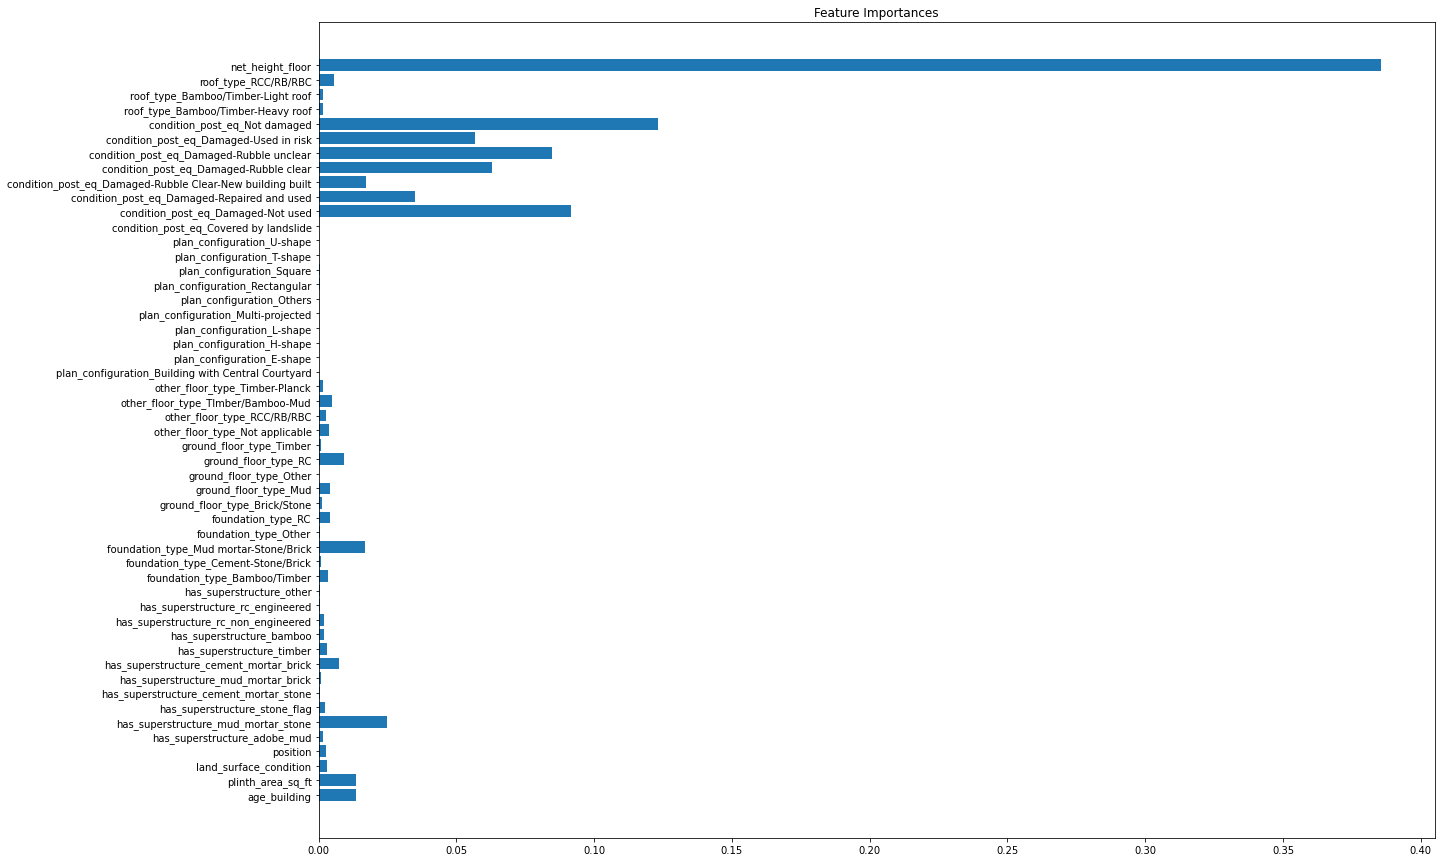

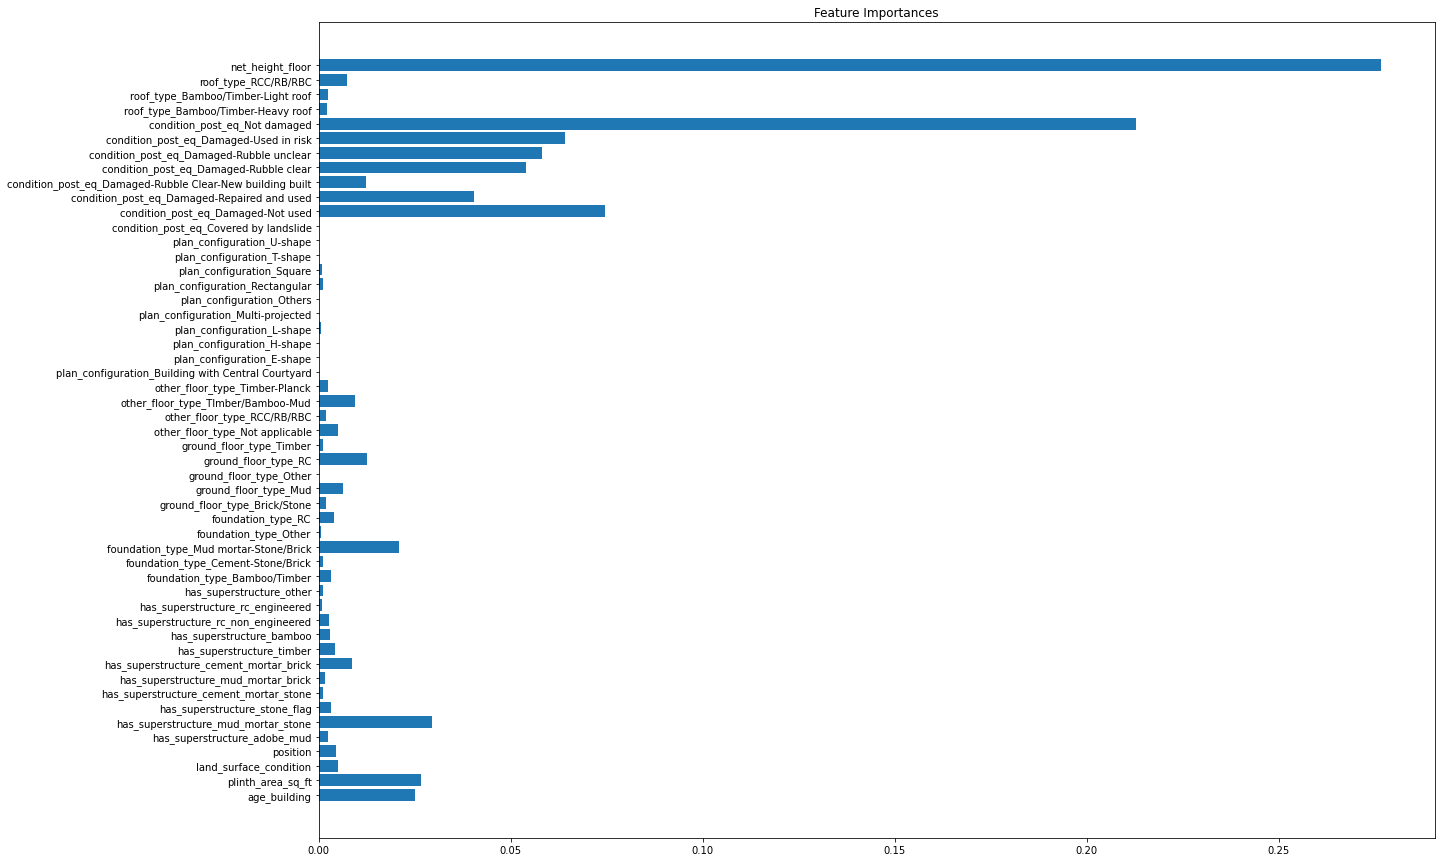

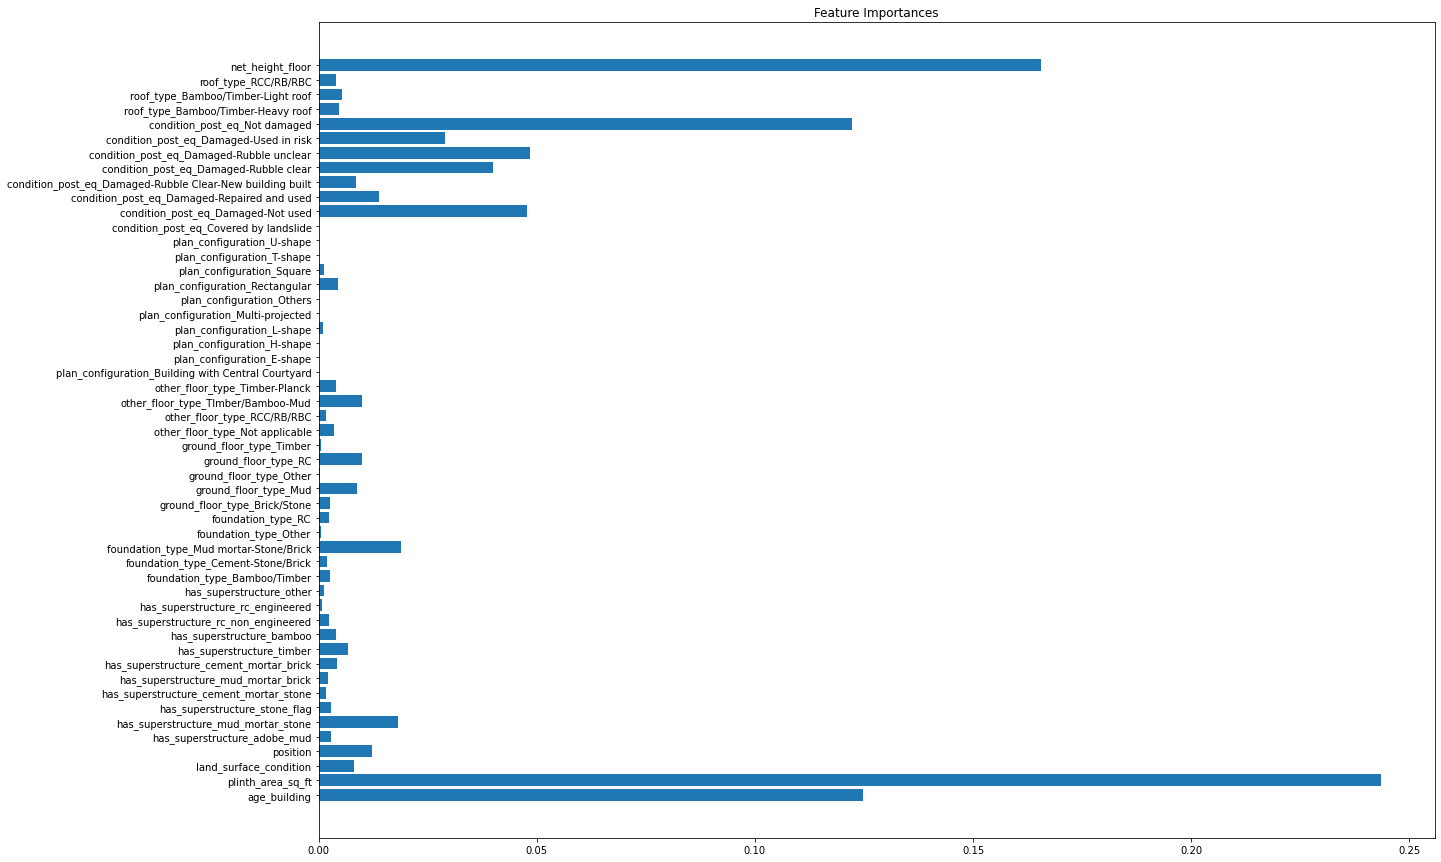

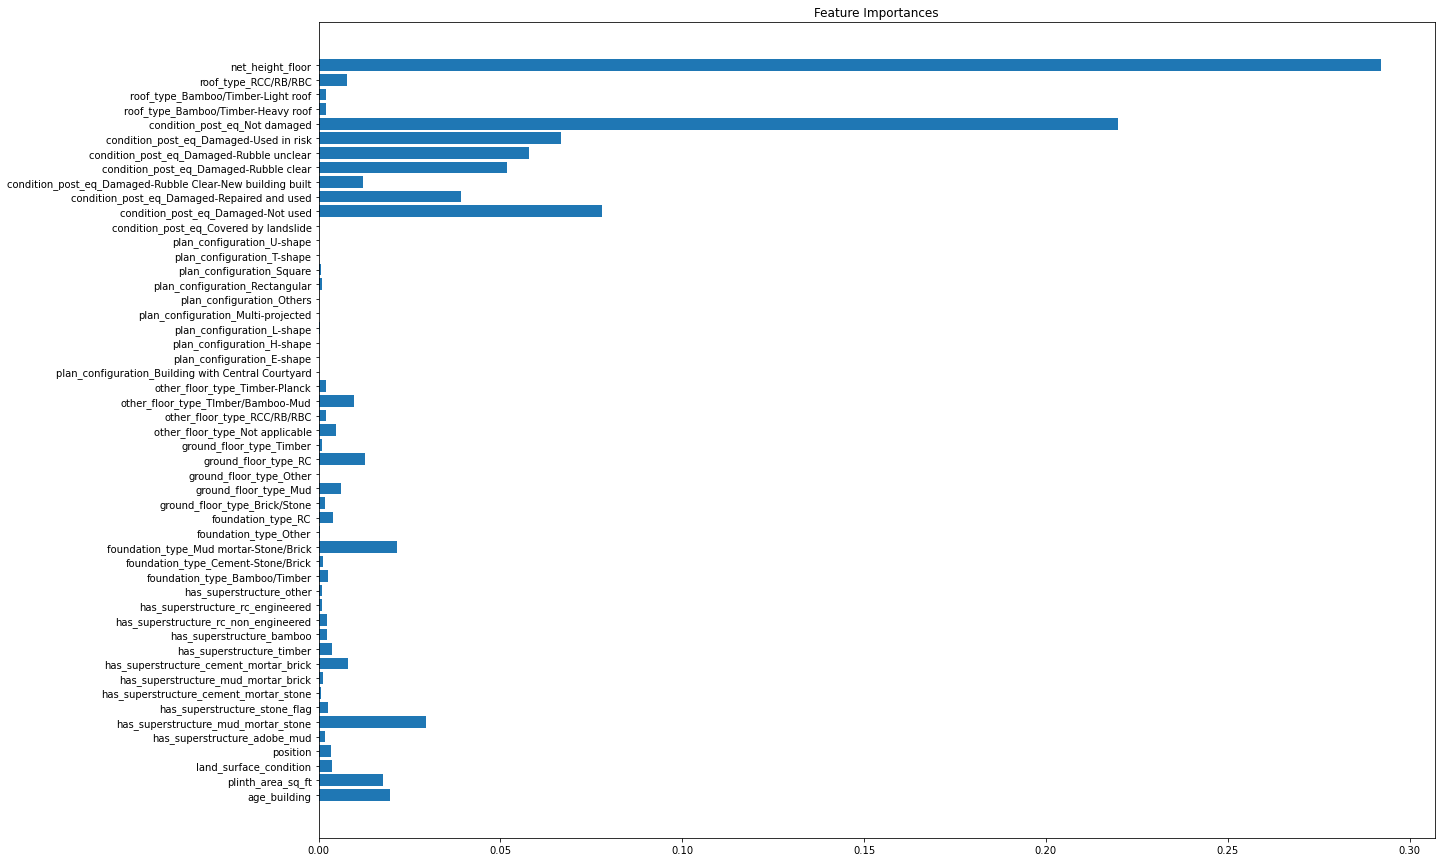

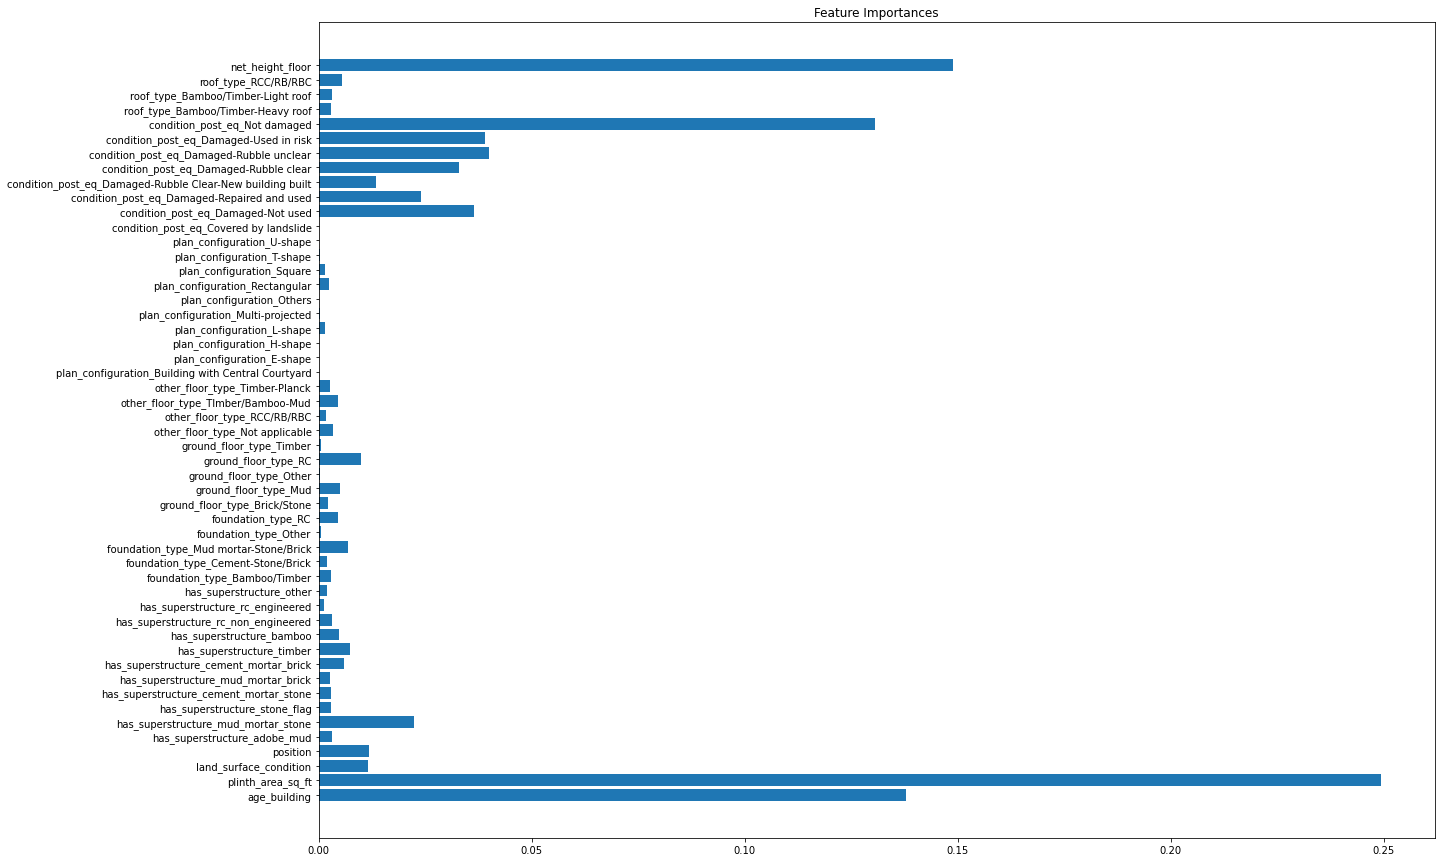

In [82]:
f_imp = plot_feature_importance(forest1,X)
f_imp = plot_feature_importance(forest2,X)
f_imp = plot_feature_importance(forest3,X)
f_imp = plot_feature_importance(forest4,X)
f_imp = plot_feature_importance(forest5,X)

Feature importance for PCA

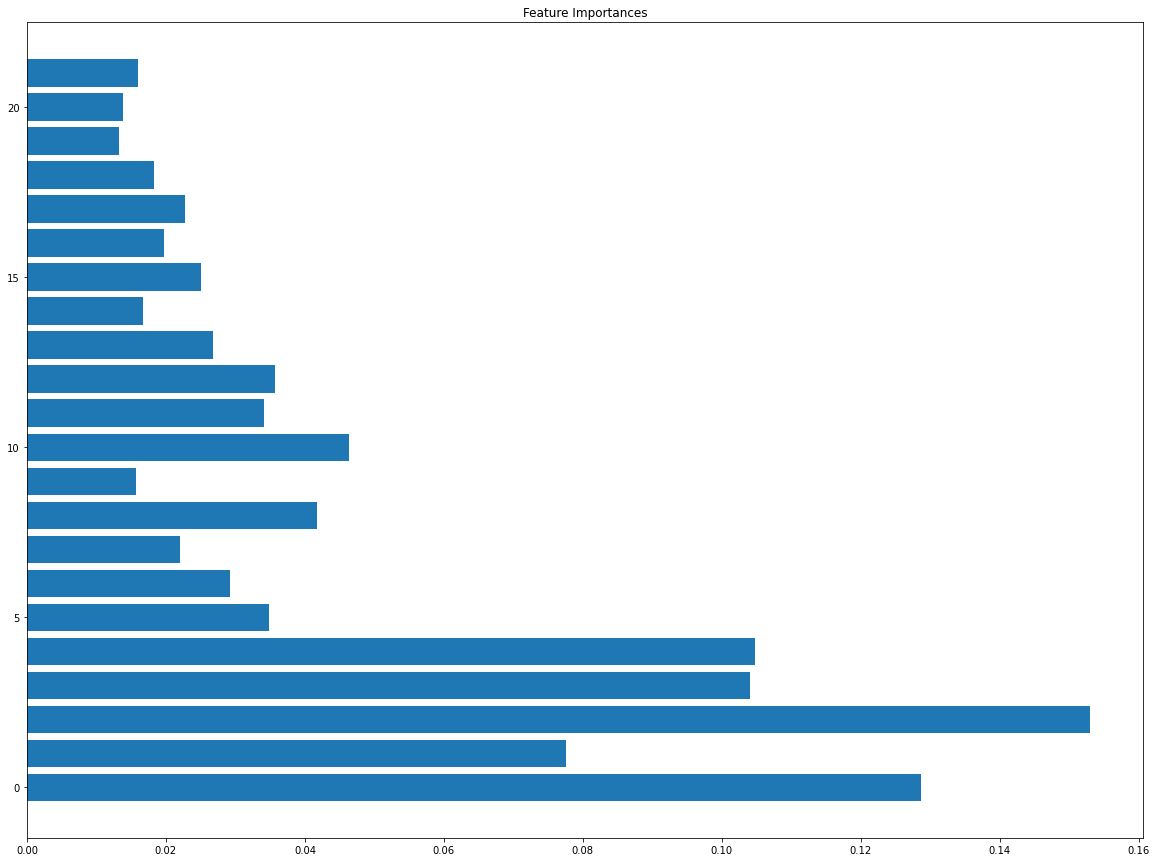

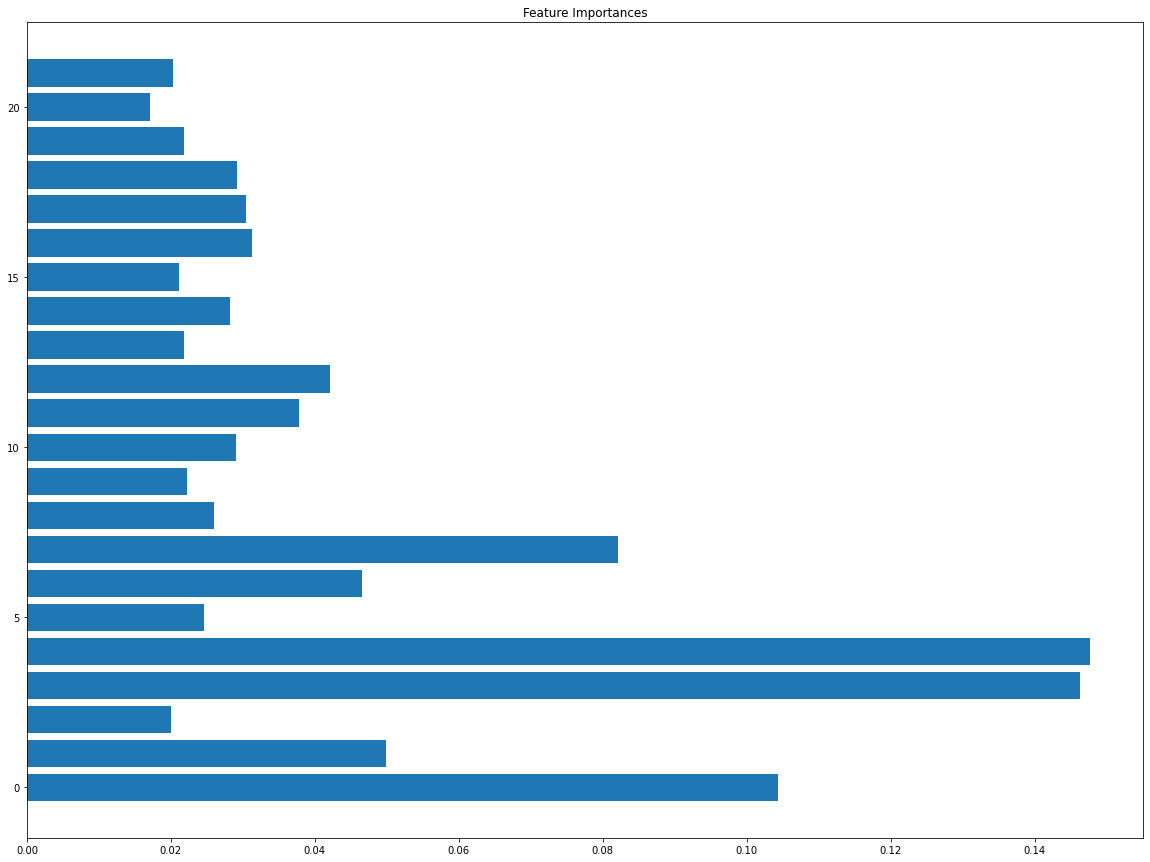

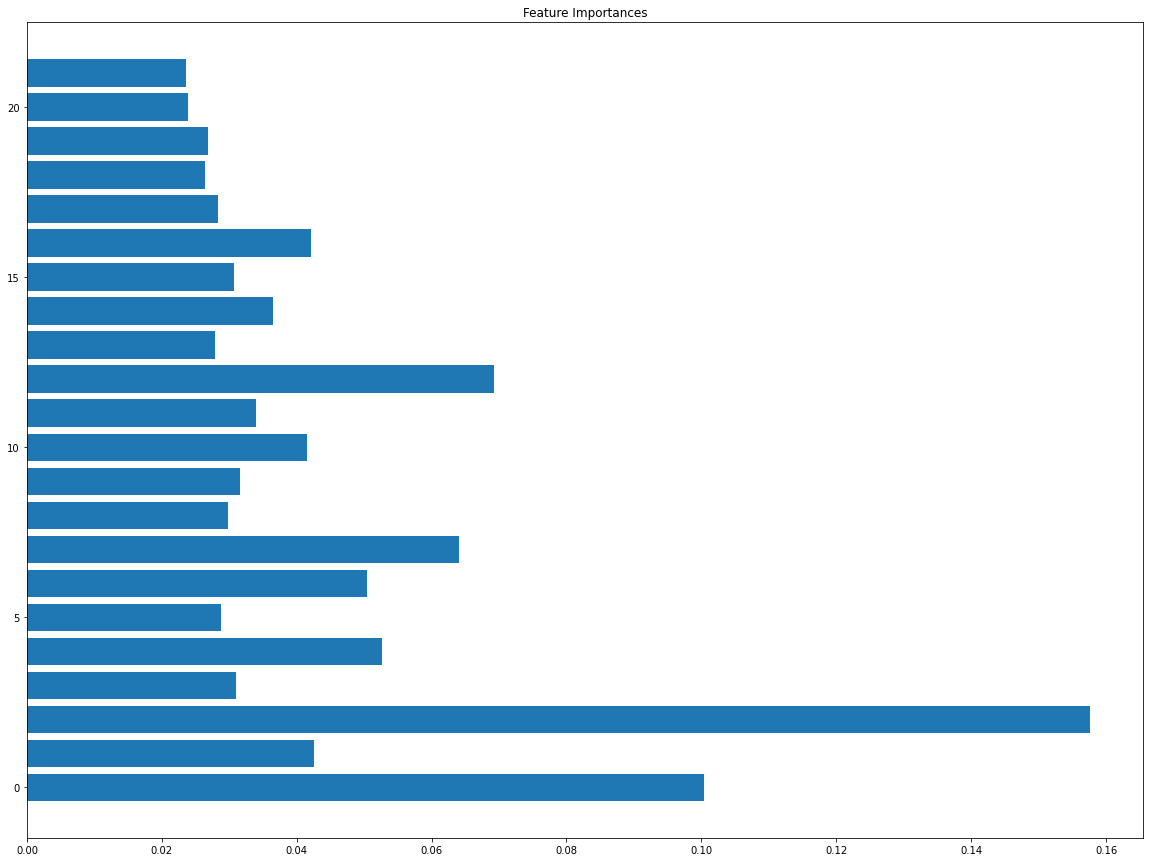

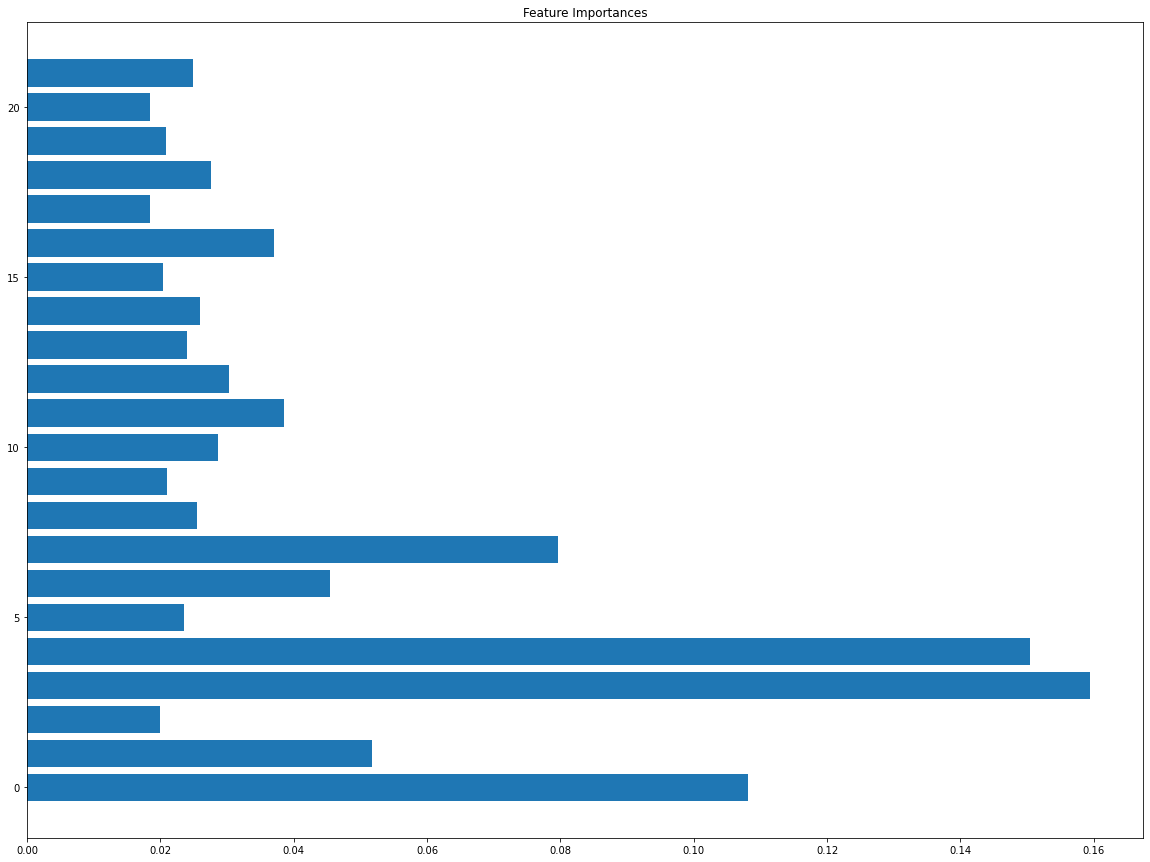

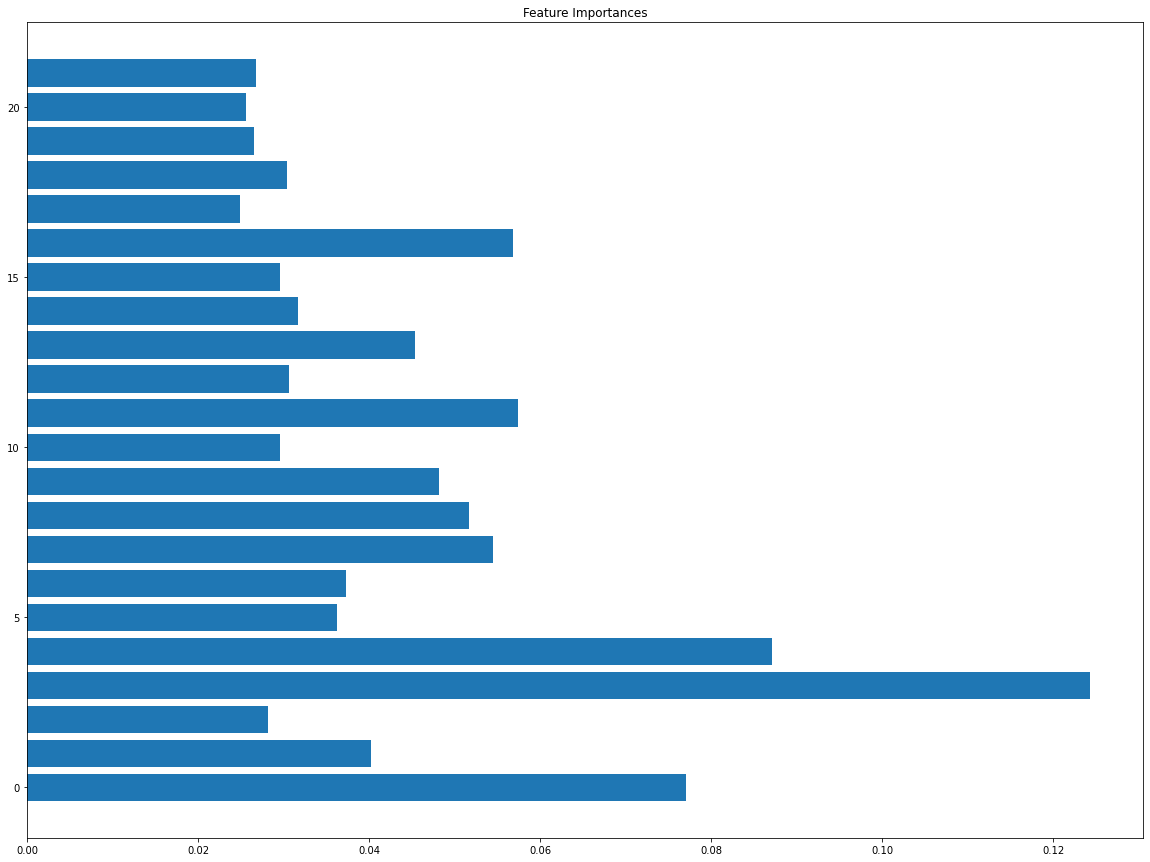

In [83]:
f_imp = plot_feature_importance(forest1_pca,X_train_normal_pca)
f_imp = plot_feature_importance(forest2_pca,X_train_ros_pca)
f_imp = plot_feature_importance(forest3_pca,X_train_smote_pca)
f_imp = plot_feature_importance(forest4_pca,X_train_rus_pca)
f_imp = plot_feature_importance(forest5_pca,X_train_nearmiss_pca)

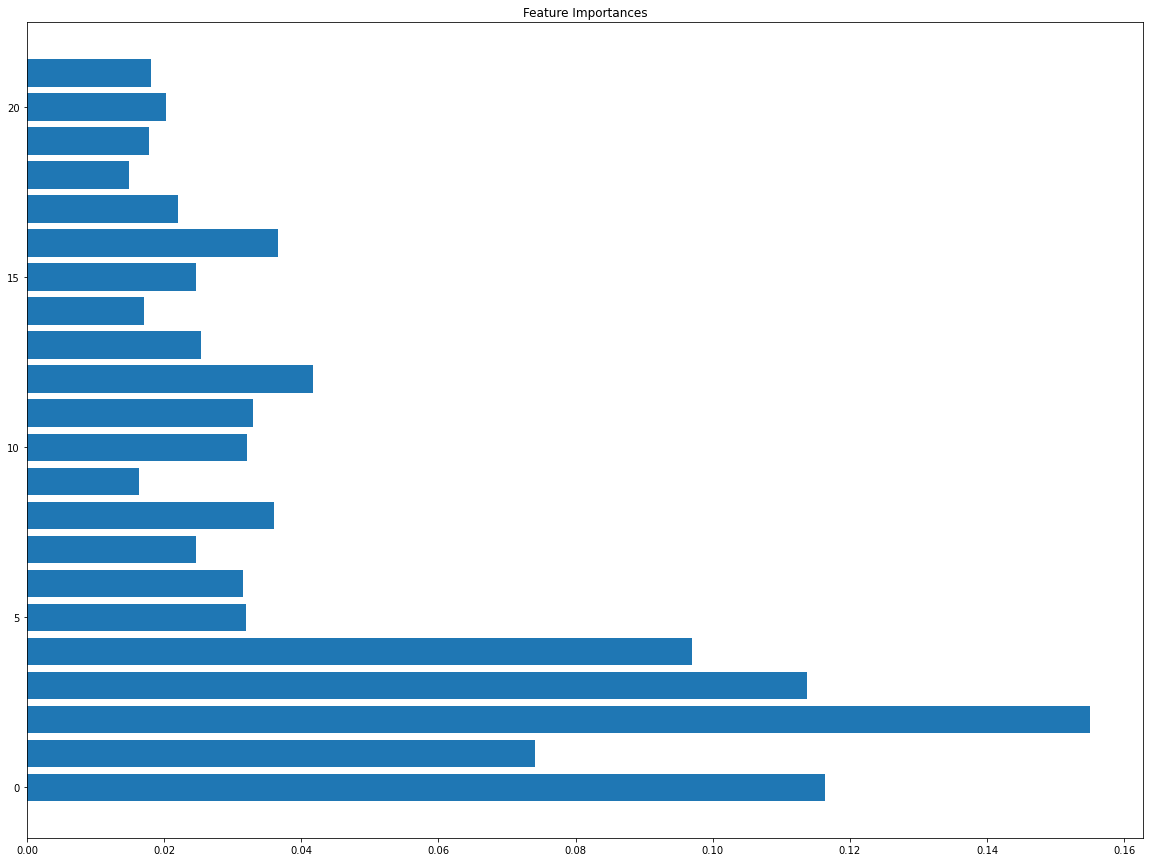

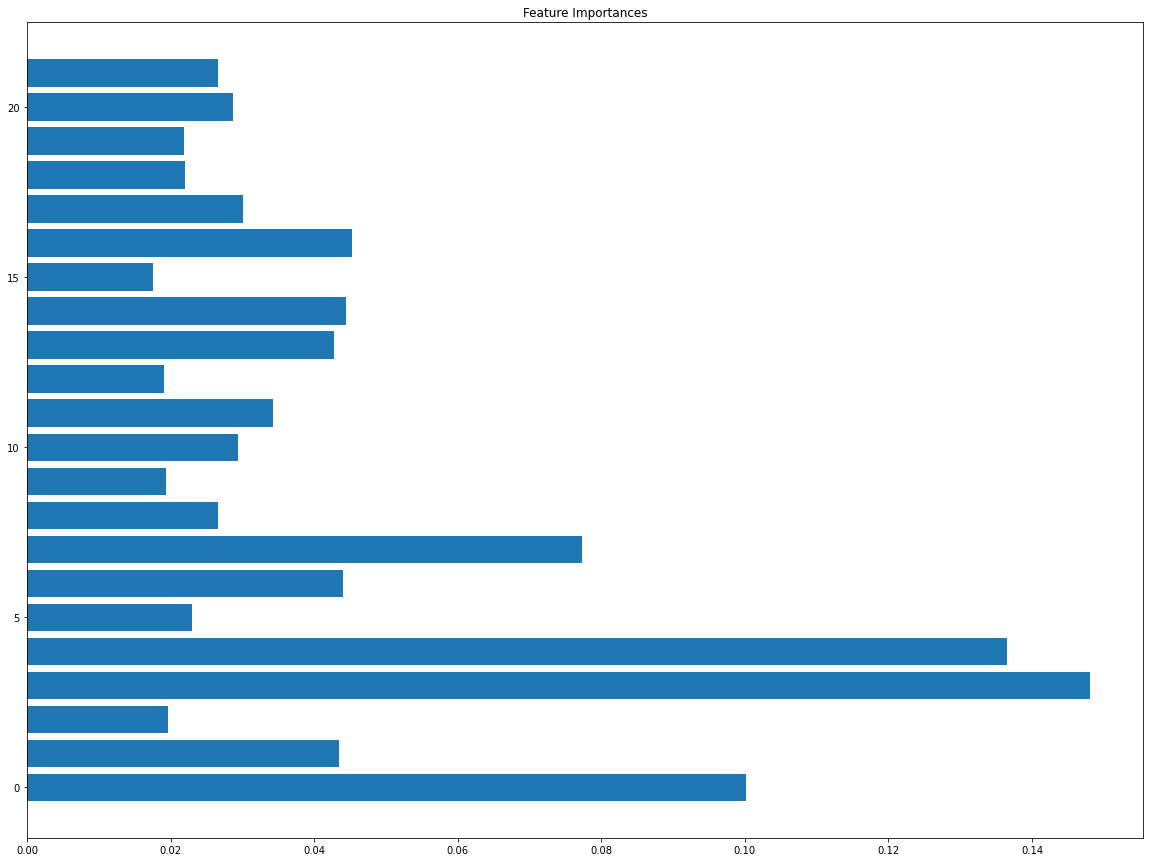

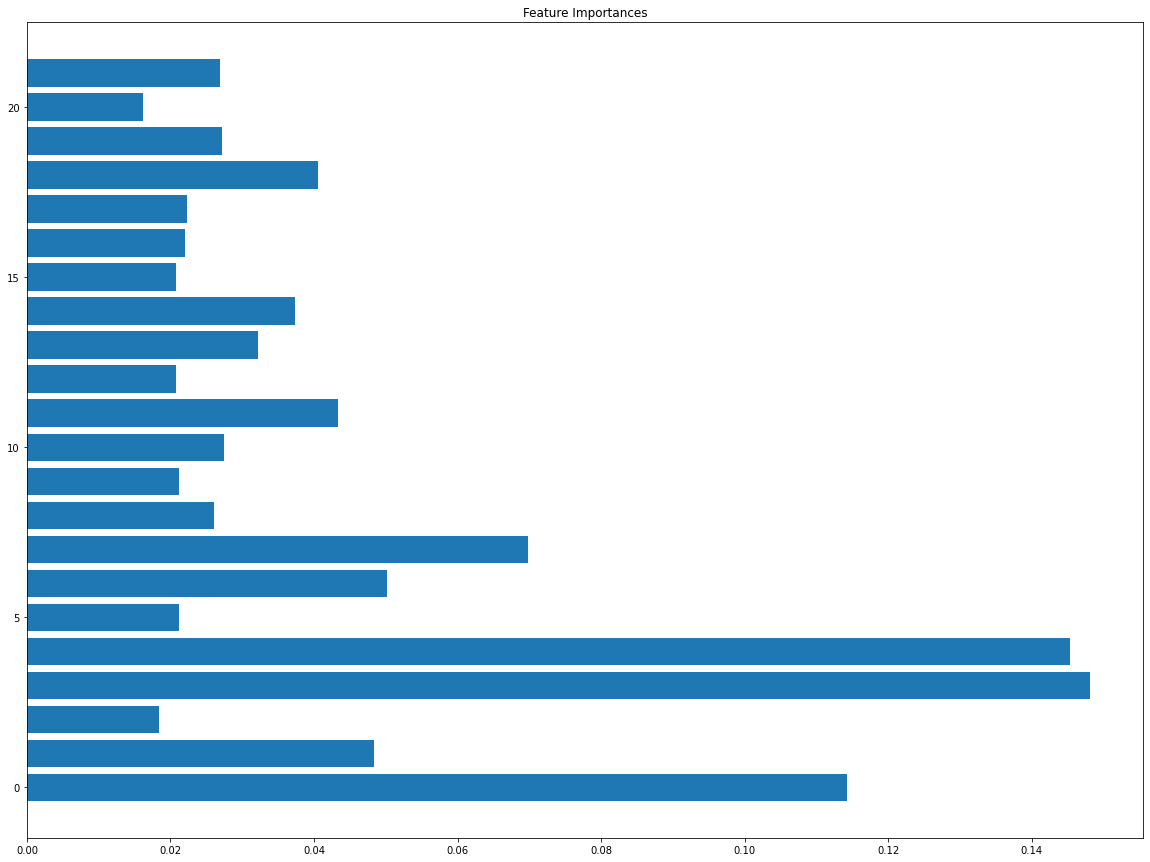

In [200]:
f_imp = plot_feature_importance(forest1,X_train_normal_pca)
f_imp = plot_feature_importance(forest2,X_train_ros_pca)
f_imp = plot_feature_importance(forest4,X_train_rus_pca)

## Hyperparameter Tuning

We tried 2 types of hyperparameter tuning
- Algorithms using GridSearch and RandomizedSearch
- Manually changing hyperparameters 

Grid Search

In [35]:
# Define the grid
def tuneGridSearch(model):
    param_grid = {
    'n_estimators': [50, 100, 200, 300,500],
    'min_samples_leaf': [1, 5, 10],
    'max_depth': [2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]}
    rf_model = model
    # Instantiate GridSearchCV
    model_gridsearch = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1_weighted',
    n_jobs=4,
    cv=5,
    refit=True,
    return_train_score=True)
    return model_gridsearch

In [36]:
forest_gridsearch = tuneGridSearch(forest1)

In [38]:
# Record the current time 
start = time.time()
# Fit the selected model
forest_gridsearch.fit(X_train, y_train)
# Print the time spend and number of models ran
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % ((time.time() - start), len(forest_gridsearch.cv_results_['params'])))

In [ ]:
print(forest_gridsearch.best_estimator_)
print(forest_gridsearch.best_score_)
print(forest_gridsearch.best_params_)
print(forest_gridsearch.best_index_)

Grid Search took a long time about 12 hours 

Randomized Search

In [ ]:
# specify distributions to sample from
param_dist = {
'n_estimators': [50,100,200,300],
'min_samples_leaf': [2,5,10,15],
'max_depth': [10,20,30],
'max_features': ['auto', 'sqrt'],
'bootstrap': [True, False]}
# specify number of search iterations
n_iter = 20
rf_model = forest1
# Instantiate RandomSearchCV
model_random_search = RandomizedSearchCV(
estimator=rf_model,
param_distributions=param_dist,
n_iter=n_iter,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
# Record the current time 
start = time.time()
# Fit the selected model
model_random_search.fit(X_train_normal, y_train)
# Print the time spend and number of models ran
print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." % ((time.time() - start), len(model_random_search.cv_results_['params'])))
print(model_random_search.best_estimator_)
print(model_random_search.best_score_)
print(model_random_search.best_params_)
print(model_random_search.best_index_)

Randomized Search took about 6 hours

Outputs after randomized search: 
RandomizedSearchCV took 6115.00 seconds for 20 candidate parameter settings.  
RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42)  
Best Score: 0.7775303092110529  
Best Params: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
5  
This resulted in test score of 0.77967 and train score 0.886577

## Saving trained Model
Model was saved in a pickle format

In [171]:
def save_model(model,name):
    pickle.dump(model,open(f'{name}.pkl','wb'))
    print(f'{name} model saved successfully')

In [173]:
save_model(forest1,'normal_model')

normal_model model saved successfully


### Predicting in new data

In [174]:
# function to predict damage


def predict_damage(input_data,model):
    """
    input_data : This is the dictionary obtained from frontend 
    e.g.:
    input_data = {
    'count_floors_pre_eq' : 4,
    'count_floors_post_eq' : 0,
    'age_building' : 42,
    'plinth_area_sq_ft' : 420,
    'height_ft_pre_eq' : 28,
    'height_ft_post_eq' : 0,  
    'land_surface_condition' : 'Flat',
    'position' : 'Attached-1 side',
    'has_superstructure' : 'adobe_mud',
    'condition_post_eq' : 'Damage-Rubble Clear-New building built',
    'technical_solution_proposed' : 'Reconstruction',
    'foundation_type' : 'Mud mortar-Stone/Brick',
    'roof_type' : 'Bamboo/Timber-Light roof',
    'ground_floor_type' : 'Mud',
    'other_floor_type' : 'Timber/Bamboo-Mud',
    'plan_configuration' : 'Rectangular'    
    }
    """
    # dataset path
    df = pd.read_csv("csv_building_structure.csv")
    #
    df.dropna(inplace=True)
    df_web = pd.Series(input_data)
    # Preprocessing the input data
    cat_nominal = ["foundation_type", "roof_type",
                   "ground_floor_type", "other_floor_type", "plan_configuration","condition_post_eq"]
    nominal_categories = {}
    for nom in cat_nominal:
        nominal_categories[f'{nom}s'] = list(df[nom].unique())
    # Label Encoded cols
    land_surface_conditions = ['Flat', 'Moderate slope', 'Steep slope']
    positions = ['Attached-1 side', 'Attached-2 side',
                 'Attached-3 side', 'Not attached']
    damage_grades = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
    # technical_solutions_proposed = [
    #     'Major repair', 'Minor repair', 'No need', 'Reconstruction']
    # conditions_post_eq = ['Covered by landslide','Damaged-Not used','Damaged-Repaired and used','Damaged-Rubble Clear-New building built','Damaged-Rubble clear','Damaged-Rubble unclear','Damaged-Used in risk','Not damaged']

    # label encoding for web variable
    df_web['land_surface_condition'] = land_surface_conditions.index(
        df_web['land_surface_condition'])
    df_web['position'] = positions.index(df_web['position'])
    # df_web['condition_post_eq'] = conditions_post_eq.index(
    #     df_web['condition_post_eq'])
    # df_web['technical_solution_proposed'] = technical_solutions_proposed.index(
    #     df_web['technical_solution_proposed'])

    # One hot encoding for web variable
    # has_superstructure, foundation_type, roof_type, ground_floor_type, other_floor_type, plan_configuration
    # * superstructure
    superstructures = ['adobe_mud', 'mud_mortar_stone', 'stone_flag', 'cement_mortar_stone', 'mud_mortar_brick',
                       'cement_mortar_brick', 'timber', 'bamboo', 'rc_non_engineered', 'rc_engineered', 'other']
    for superstructure in superstructures:
        for input_superstructure in input_data['has_superstructure']:
            key = f'has_superstructure_{superstructure}'
            if key in df_web.keys():
                if df_web[f'has_superstructure_{superstructure}'] != 1:
                    df_web[f'has_superstructure_{superstructure}'] = 1 if input_superstructure == superstructure else 0
            else:
                df_web[f'has_superstructure_{superstructure}'] = 1 if input_superstructure == superstructure else 0

    # * foundation_type
    for foundation_type in nominal_categories['foundation_types']:
        df_web[f'foundation_type_{foundation_type}'] = 1 if input_data['foundation_type'] == foundation_type else 0

    # * roof_type
    for roof_type in nominal_categories['roof_types']:
        df_web[f'roof_type_{roof_type}'] = 1 if input_data['roof_type'] == roof_type else 0

    # * ground_floor_type
    for ground_floor_type in nominal_categories['ground_floor_types']:
        df_web[f'ground_floor_type_{ground_floor_type}'] = 1 if input_data['ground_floor_type'] == ground_floor_type else 0

    # * other_floor_type
    for other_floor_type in nominal_categories['other_floor_types']:
        df_web[f'other_floor_type_{other_floor_type}'] = 1 if input_data['other_floor_type'] == other_floor_type else 0

    # * plan_configuration
    for plan_configuration in nominal_categories['plan_configurations']:
        df_web[f'plan_configuration_{plan_configuration}'] = 1 if input_data['plan_configuration'] == plan_configuration else 0

    # * plan_configuration
    for condition_post_eq in nominal_categories['condition_post_eqs']:
        df_web[f'condition_post_eq_{condition_post_eq}'] = 1 if input_data['condition_post_eq'] == condition_post_eq else 0

    # df_web['net_floors'] = df_web['count_floors_post_eq'] - df_web['count_floors_pre_eq']
    # df_web['net_height'] = df_web['height_ft_post_eq'] - df_web['height_ft_pre_eq']
    # removing unwanted cols
    cols_to_remove = ['has_superstructure', 'foundation_type', 'roof_type',
                      'ground_floor_type', 'other_floor_type', 'plan_configuration','condition_post_eq']
    df_test_web = df_web.drop(cols_to_remove)

    df_test_web = df_test_web.to_frame().transpose()

    reordered_cols = ['count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'position', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'foundation_type_Bamboo/Timber', 'foundation_type_Cement-Stone/Brick',
       'foundation_type_Mud mortar-Stone/Brick', 'foundation_type_Other',
       'foundation_type_RC', 'ground_floor_type_Brick/Stone',
       'ground_floor_type_Mud', 'ground_floor_type_Other',
       'ground_floor_type_RC', 'ground_floor_type_Timber',
       'other_floor_type_Not applicable', 'other_floor_type_RCC/RB/RBC',
       'other_floor_type_TImber/Bamboo-Mud', 'other_floor_type_Timber-Planck',
       'plan_configuration_Building with Central Courtyard',
       'plan_configuration_E-shape', 'plan_configuration_H-shape',
       'plan_configuration_L-shape', 'plan_configuration_Multi-projected',
       'plan_configuration_Others', 'plan_configuration_Rectangular',
       'plan_configuration_Square', 'plan_configuration_T-shape',
       'plan_configuration_U-shape', 'condition_post_eq_Covered by landslide',
       'condition_post_eq_Damaged-Not used',
       'condition_post_eq_Damaged-Repaired and used',
       'condition_post_eq_Damaged-Rubble Clear-New building built',
       'condition_post_eq_Damaged-Rubble clear',
       'condition_post_eq_Damaged-Rubble unclear',
       'condition_post_eq_Damaged-Used in risk',
       'condition_post_eq_Not damaged', 'roof_type_Bamboo/Timber-Heavy roof',
       'roof_type_Bamboo/Timber-Light roof', 'roof_type_RCC/RB/RBC']
    df_test_web = df_test_web.reindex(columns=reordered_cols)
    # print(df_test_web.isna().sum())

    y_pred = model.predict(df_test_web.to_numpy())

    predicted_output = damage_grades[y_pred[0]]

    return predicted_output

In [124]:
# function to predict damage


def predict_damage1(input_data,model):
    """
    input_data : This is the dictionary obtained from frontend 
    e.g.:
    input_data = {
    'count_floors_pre_eq' : 4,
    'count_floors_post_eq' : 0,
    'age_building' : 42,
    'plinth_area_sq_ft' : 420,
    'height_ft_pre_eq' : 28,
    'height_ft_post_eq' : 0,  
    'land_surface_condition' : 'Flat',
    'position' : 'Attached-1 side',
    'has_superstructure' : 'adobe_mud',
    'condition_post_eq' : 'Damage-Rubble Clear-New building built',
    'technical_solution_proposed' : 'Reconstruction',
    'foundation_type' : 'Mud mortar-Stone/Brick',
    'roof_type' : 'Bamboo/Timber-Light roof',
    'ground_floor_type' : 'Mud',
    'other_floor_type' : 'Timber/Bamboo-Mud',
    'plan_configuration' : 'Rectangular'    
    }
    """
    # dataset path
    df = pd.read_csv("csv_building_structure.csv")
    #
    df.dropna(inplace=True)
    df_web = pd.Series(input_data)
    cat_nominal = ["foundation_type", "roof_type",
                   "ground_floor_type", "other_floor_type", "plan_configuration","condition_post_eq"]
    nominal_categories = {}
    for nom in cat_nominal:
        nominal_categories[f'{nom}s'] = list(df[nom].unique())
    # Label Encoded cols
    land_surface_conditions = ['Flat', 'Moderate slope', 'Steep slope']
    positions = ['Attached-1 side', 'Attached-2 side',
                 'Attached-3 side', 'Not attached']
    damage_grades = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
    # technical_solutions_proposed = [
    #     'Major repair', 'Minor repair', 'No need', 'Reconstruction']
    conditions_post_eq = ['Covered by landslide','Damage-Not used','Damage-Repaired and used','Damage-Rubble Clear-New building built','Damage-Rubble clear','Damage-Rubble unclear','Damage-Used in risk','Not damaged']

    # label encoding for web variable
    df_web['land_surface_condition'] = land_surface_conditions.index(
        df_web['land_surface_condition'])
    df_web['position'] = positions.index(df_web['position'])
    df_web['condition_post_eq'] = conditions_post_eq.index(
        df_web['condition_post_eq'])
    # df_web['technical_solution_proposed'] = technical_solutions_proposed.index(
    #     df_web['technical_solution_proposed'])

    # One hot encoding for web variable
    # has_superstructure, foundation_type, roof_type, ground_floor_type, other_floor_type, plan_configuration
    # * superstructure
    superstructures = ['adobe_mud', 'mud_mortar_stone', 'stone_flag', 'cement_mortar_stone', 'mud_mortar_brick',
                       'cement_mortar_brick', 'timber', 'bamboo', 'rc_non_engineered', 'rc_engineered', 'other']
    for superstructure in superstructures:
        for input_superstructure in input_data['has_superstructure']:
            key = f'has_superstructure_{superstructure}'
            if key in df_web.keys():
                if df_web[f'has_superstructure_{superstructure}'] != 1:
                    df_web[f'has_superstructure_{superstructure}'] = 1 if input_superstructure == superstructure else 0
            else:
                df_web[f'has_superstructure_{superstructure}'] = 1 if input_superstructure == superstructure else 0

    # * foundation_type
    for foundation_type in nominal_categories['foundation_types']:
        df_web[f'foundation_type_{foundation_type}'] = 1 if input_data['foundation_type'] == foundation_type else 0

    # * roof_type
    for roof_type in nominal_categories['roof_types']:
        df_web[f'roof_type_{roof_type}'] = 1 if input_data['roof_type'] == roof_type else 0

    # * ground_floor_type
    for ground_floor_type in nominal_categories['ground_floor_types']:
        df_web[f'ground_floor_type_{ground_floor_type}'] = 1 if input_data['ground_floor_type'] == ground_floor_type else 0

    # * other_floor_type
    for other_floor_type in nominal_categories['other_floor_types']:
        df_web[f'other_floor_type_{other_floor_type}'] = 1 if input_data['other_floor_type'] == other_floor_type else 0

    # * plan_configuration
    for plan_configuration in nominal_categories['plan_configurations']:
        df_web[f'plan_configuration_{plan_configuration}'] = 1 if input_data['plan_configuration'] == plan_configuration else 0


    # df_web['net_floors'] = df_web['count_floors_post_eq'] - df_web['count_floors_pre_eq']
    # df_web['net_height'] = df_web['height_ft_post_eq'] - df_web['height_ft_pre_eq']
    # removing unwanted cols
    cols_to_remove = ['has_superstructure', 'foundation_type', 'roof_type',
                      'ground_floor_type', 'other_floor_type', 'plan_configuration']
    df_test_web = df_web.drop(cols_to_remove)

    df_test_web = df_test_web.to_frame().transpose()

    reordered_cols = ['count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'position', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'foundation_type_Bamboo/Timber',
       'foundation_type_Cement-Stone/Brick',
       'foundation_type_Mud mortar-Stone/Brick', 'foundation_type_Other',
       'foundation_type_RC', 'ground_floor_type_Brick/Stone',
       'ground_floor_type_Mud', 'ground_floor_type_Other',
       'ground_floor_type_RC', 'ground_floor_type_Timber',
       'other_floor_type_Not applicable', 'other_floor_type_RCC/RB/RBC',
       'other_floor_type_TImber/Bamboo-Mud', 'other_floor_type_Timber-Planck',
       'plan_configuration_Building with Central Courtyard',
       'plan_configuration_E-shape', 'plan_configuration_H-shape',
       'plan_configuration_L-shape', 'plan_configuration_Multi-projected',
       'plan_configuration_Others', 'plan_configuration_Rectangular',
       'plan_configuration_Square', 'plan_configuration_T-shape',
       'plan_configuration_U-shape', 'roof_type_Bamboo/Timber-Heavy roof',
       'roof_type_Bamboo/Timber-Light roof', 'roof_type_RCC/RB/RBC']
    df_test_web = df_test_web.reindex(columns=reordered_cols)
    # print(df_test_web.isna().sum())

    y_pred = model.predict(df_test_web.to_numpy())

    predicted_output = damage_grades[y_pred[0]]

    return predicted_output

Input data and description

In [119]:
input_data = {
        'count_floors_pre_eq': 1,
        'count_floors_post_eq': 1,
        'age_building': 30,
        'plinth_area_sq_ft': 308,
        'height_ft_pre_eq': 9,
        'height_ft_post_eq': 9,
        'land_surface_condition': 'Flat',
        'position': 'Not attached',
        'has_superstructure': ['mud_mortar_stone'],
        'condition_post_eq': 'Damage-Repaired and used',
        'foundation_type': 'Other',
        'roof_type': 'Bamboo/Timber-Light roof',
        'ground_floor_type': 'Mud',
        'other_floor_type': 'Not applicable',
        'plan_configuration': 'Rectangular'
    }

input_data1 = {
    'count_floors_pre_eq': 5,
    'count_floors_post_eq': 0,
    'age_building': 25,
    'plinth_area_sq_ft': 200,
    'height_ft_pre_eq': 30,
    'height_ft_post_eq': 0,
    'land_surface_condition': 'Flat',
    'position': 'Not attached',
    'has_superstructure': ['mud_mortar_stone', 'timber'],
    'condition_post_eq': 'Damage-Not used',
    'foundation_type': 'Mud mortar-Stone/Brick',
    'roof_type': 'Bamboo/Timber-Heavy roof',
    'ground_floor_type': 'Mud',
    'other_floor_type': 'Timber/Bamboo-Mud',
    'plan_configuration': 'Rectangular'
}

grade_descriptions = {
    'Grade 1': 'Hairline to thin cracks in plaster on few walls, falling of plaster bits in limited parts, fall of loose stone from upper part of the building in a few cases, only architectural repairs needed.',
    'Grade 2': 'Cracks in many walls, falling of plaster in last bits over large area, damage to non structural parts like chimney, projecting cornices. The load carrying capacity of the building is not reduced appreciably.',
    'Grade 3': 'Large and extensive cracks in most walls, collapse of small portion of non load-bearing walls, roof tile detachment, tilting or failing of chimneys, failure of individual non-structural elements such as partition/gable walls, delamination of stone/adobe walls, load carrying capacity of structure is partially reduced and significant structural repair is required.',
    'Grade 4': 'Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.',
    'Grade 5': 'Total or near collapse of the building.'
}

In [175]:
start_time = time.time()
predicted_grade = predict_damage(input_data1,forest1)
predicted_description = grade_descriptions[predicted_grade]
print(f'Predicted Damage For Input: {predicted_grade}')
print(f'Damage Description: {predicted_description}')
end_time = time.time()
time_taken = end_time - start_time
print(f'Total Time taken: {time_taken} seconds')

Predicted Damage For Input: Grade 4
Damage Description: Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.
Total Time taken: 8.105281114578247 seconds


In [176]:
start_time = time.time()
predicted_grade = predict_damage(input_data1,forest2)
predicted_description = grade_descriptions[predicted_grade]
print(f'Predicted Damage For Input: {predicted_grade}')
print(f'Damage Description: {predicted_description}')
end_time = time.time()
time_taken = end_time - start_time
print(f'Total Time taken: {time_taken} seconds')

Predicted Damage For Input: Grade 4
Damage Description: Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.
Total Time taken: 6.000423908233643 seconds


In [127]:
start_time = time.time()
predicted_grade = predict_damage(input_data1,forest4)
predicted_description = grade_descriptions[predicted_grade]
print(f'Predicted Damage For Input: {predicted_grade}')
print(f'Damage Description: {predicted_description}')
end_time = time.time()
time_taken = end_time - start_time
print(f'Total Time taken: {time_taken} seconds')

Predicted Damage For Input: Grade 4
Damage Description: Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.
Total Time taken: 4.897111177444458 seconds


In [178]:
start_time = time.time()
predicted_grade = predict_damage(input_data,xgb)
predicted_description = grade_descriptions[predicted_grade]
print(f'Predicted Damage For Input: {predicted_grade}')
print(f'Damage Description: {predicted_description}')
end_time = time.time()
time_taken = end_time - start_time
print(f'Total Time taken: {time_taken} seconds')

Predicted Damage For Input: Grade 4
Damage Description: Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.
Total Time taken: 6.460156679153442 seconds
